# Phase features


### VARIANCE FRACTAL DIMENSION TRAJECTORY:
"Variance Fractal Dimension Trajectory" is a concept that blends ideas from fractal geometry with time series analysis. It generally involves estimating the fractal dimension of a dataset (or trajectory) based on the scaling behavior of its variance, and then tracking how that fractal dimension evolves over time.

# Libraries

In [2]:
import numpy as np
from analysis_functions import *


2025-05-05 18:36:26.409316: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 18:36:26.414558: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 18:36:26.430731: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-05 18:36:26.455327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-05 18:36:26.462349: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-05 18:36:28.035294: W tensorflow/compiler/tf2tensorrt/utils/p

# Load Signal

In [4]:

data_dir = "../../data/"

sufix = 10
sample = 5  #0 - 9999
fs = 25e6  #sample_frequency
dt = 1/25e6 #period

samples,_ = load_samples(data_dir,f"{sufix:03d}")

# Obtain I[0] and Q[1] signals
iq_signal = samples[sample,:,]
i_signal = samples[sample,:,0]
q_signal = samples[sample,:,1]


print('Done')

Done


In [4]:
iq_signal = samples[sample,:,]
print(iq_signal[:,].shape)
print(i_signal.shape)

(11000, 2)
(11000,)


# Variance Fractal Dimension Trajectory

In [5]:
def VFDT(i_signal, q_signal, win_length, win_shift):
    """
    Compute the Variance Fractal Dimension Trajectory (VFDT) for a discrete-time IQ signal.
    
    The VFDT is computed separately for:
      1. Complex increments: differences between successive complex samples.
      2. Magnitude differences: differences between successive magnitudes.
      3. Phase differences: differences between successive unwrapped phases.
      
    The VFDT for a window is estimated as:
    
         VFDT(i) = D(i) = 2 - [log(var(Δx))] / [2 * log(Δw)]
    
    where:
      - Δx is the set of differences within the window.
      - Δw is the number of samples in the current window (which is equal to win_length here).
    
    In this updated version, any window with fewer than win_length samples is discarded.
    
    Parameters:
      i_signal (np.array): In-phase component, shape (N,)
      q_signal (np.array): Quadrature component, shape (N,)
      win_length (int): Number of samples per window.
      win_shift (int): Number of samples to shift the window on each step.
      
    Returns:
      vfdt_complex (np.array): VFDT values computed from complex increments.
      vfdt_magnitude (np.array): VFDT values computed from magnitude differences.
      vfdt_phase (np.array): VFDT values computed from phase differences.
      window_indices (np.array): The starting index of each complete window.
    """
    # Combine i and q signals into complex form
    complex_signal = i_signal + 1j * q_signal
    
    # Initialize lists for VFDT values and window start indices
    vfdt_complex_list = []
    vfdt_magnitude_list = []
    vfdt_phase_list = []
    window_indices = []
    
    n_samples = len(complex_signal)
    
    # Use range that ensures complete windows only
    for start in range(0, n_samples - win_length + 1, win_shift):
        end = start + win_length
        window = complex_signal[start:end]
        
        # -------------------------
        # Complex increments VFDT
        # -------------------------
        diff_complex = window[1:] - window[:-1]
        var_complex = np.var(diff_complex)
        if var_complex <= 0:
            vfdt_complex = 2.0
        else:
            vfdt_complex = 2 - (np.log(var_complex) / (2 * np.log(win_length)))
        
        # -------------------------
        # Magnitude differences VFDT
        # -------------------------
        mag = np.abs(window)
        diff_mag = mag[1:] - mag[:-1]
        var_mag = np.var(diff_mag)
        if var_mag <= 0:
            vfdt_magnitude = 2.0
        else:
            vfdt_magnitude = 2 - (np.log(var_mag) / (2 * np.log(win_length)))
        
        # -------------------------
        # Phase differences VFDT
        # -------------------------
        phase = np.angle(window)
        phase_unwrapped = np.unwrap(phase)
        #phase_diff = savgol_filter(phase_unwrapped, window_length=5, polyorder=2, deriv=1, delta=dt)
        diff_phase = phase_unwrapped[1:] - phase_unwrapped[:-1]
        #diff_phase = phase_diff[1:] - phase_diff[:-1]
        var_phase = np.var(phase_unwrapped)
        #var_phase = np.var(diff_phase)
        if var_phase <= 0:
            vfdt_phase = 2.0
        else:
            vfdt_phase = 2 - (np.log(var_phase) / (2 * np.log(win_length)))
        
        # Append computed values and the window's start index
        vfdt_complex_list.append(vfdt_complex)
        vfdt_magnitude_list.append(vfdt_magnitude)
        vfdt_phase_list.append(vfdt_phase)
        window_indices.append(start)
    
    # Convert lists to numpy arrays for output
    vfdt_complex_array = np.array(vfdt_complex_list)
    vfdt_magnitude_array = np.array(vfdt_magnitude_list)
    vfdt_phase_array = np.array(vfdt_phase_list)
    window_indices_array = np.array(window_indices)
    
    return (np.array(vfdt_complex_list), np.array(vfdt_magnitude_list),
            np.array(vfdt_phase_list), np.array(window_indices))


## Test 

Processing with win_length = 50 and win_shift = 50...


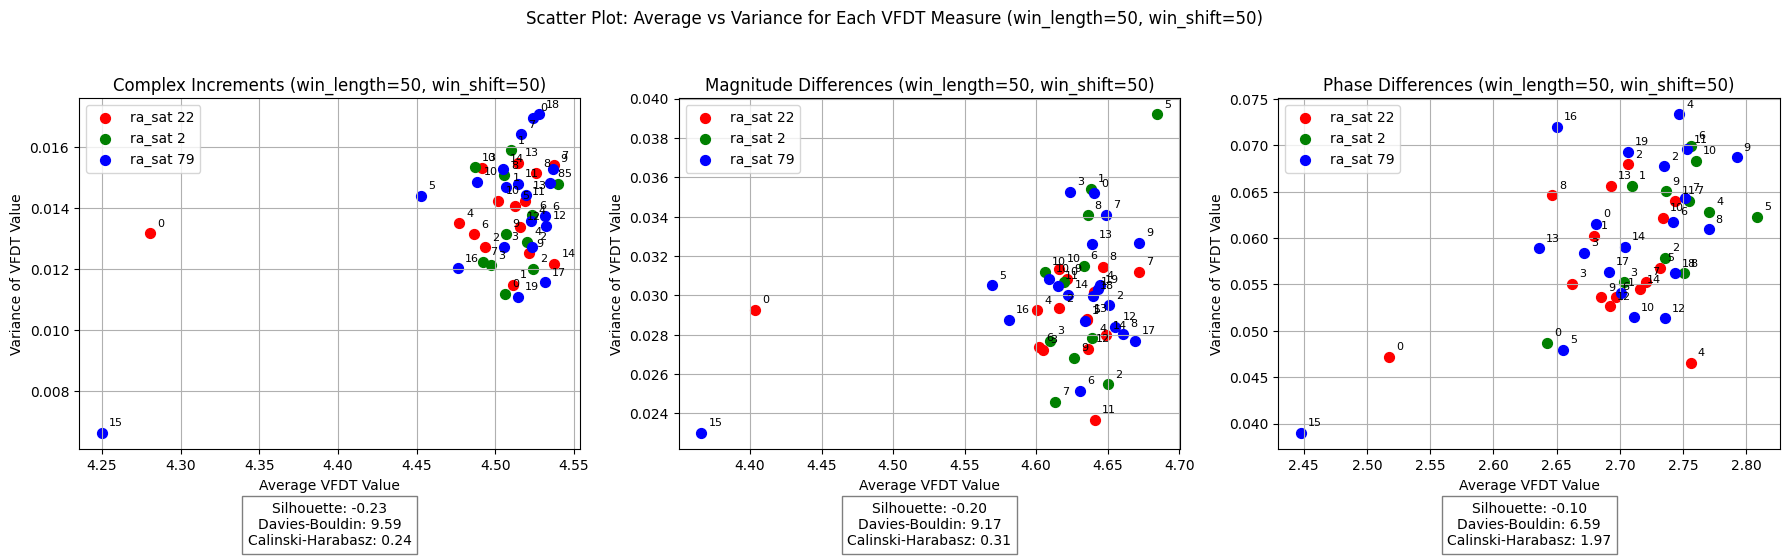

Processing with win_length = 100 and win_shift = 50...


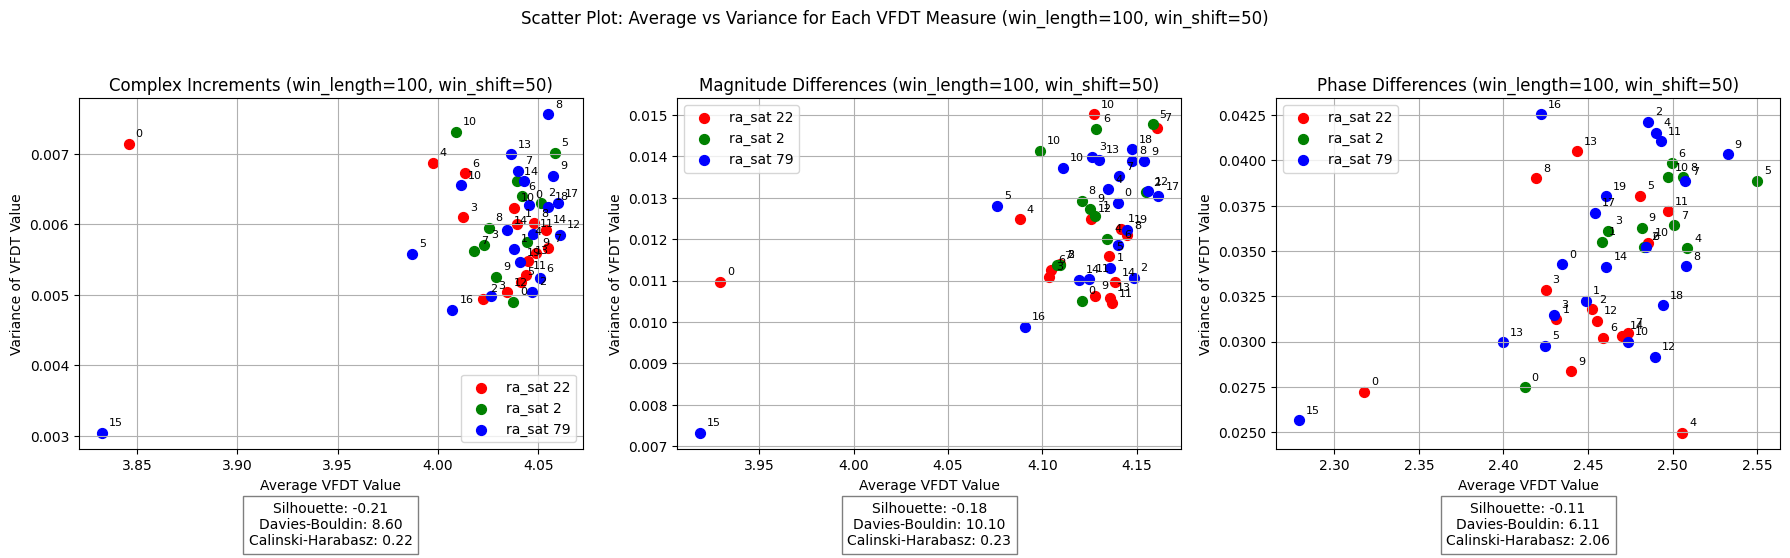

Processing with win_length = 100 and win_shift = 100...


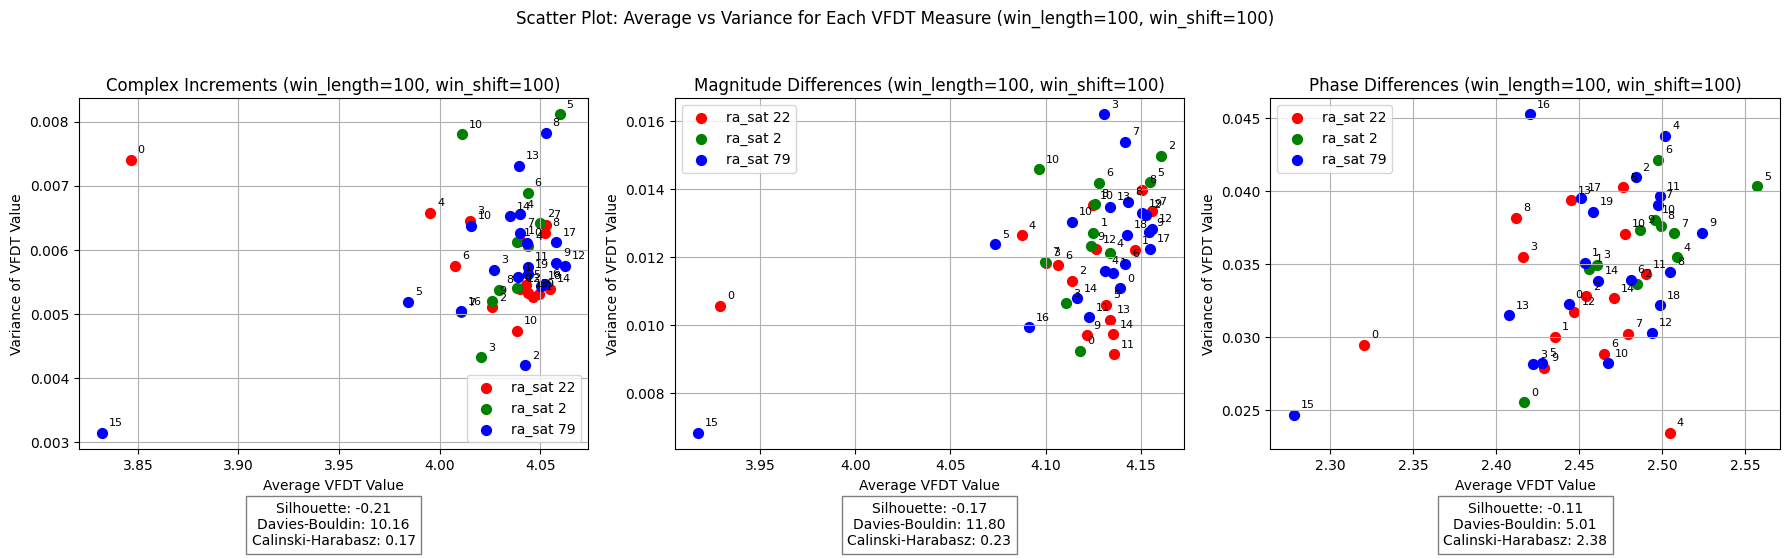

Processing with win_length = 150 and win_shift = 50...


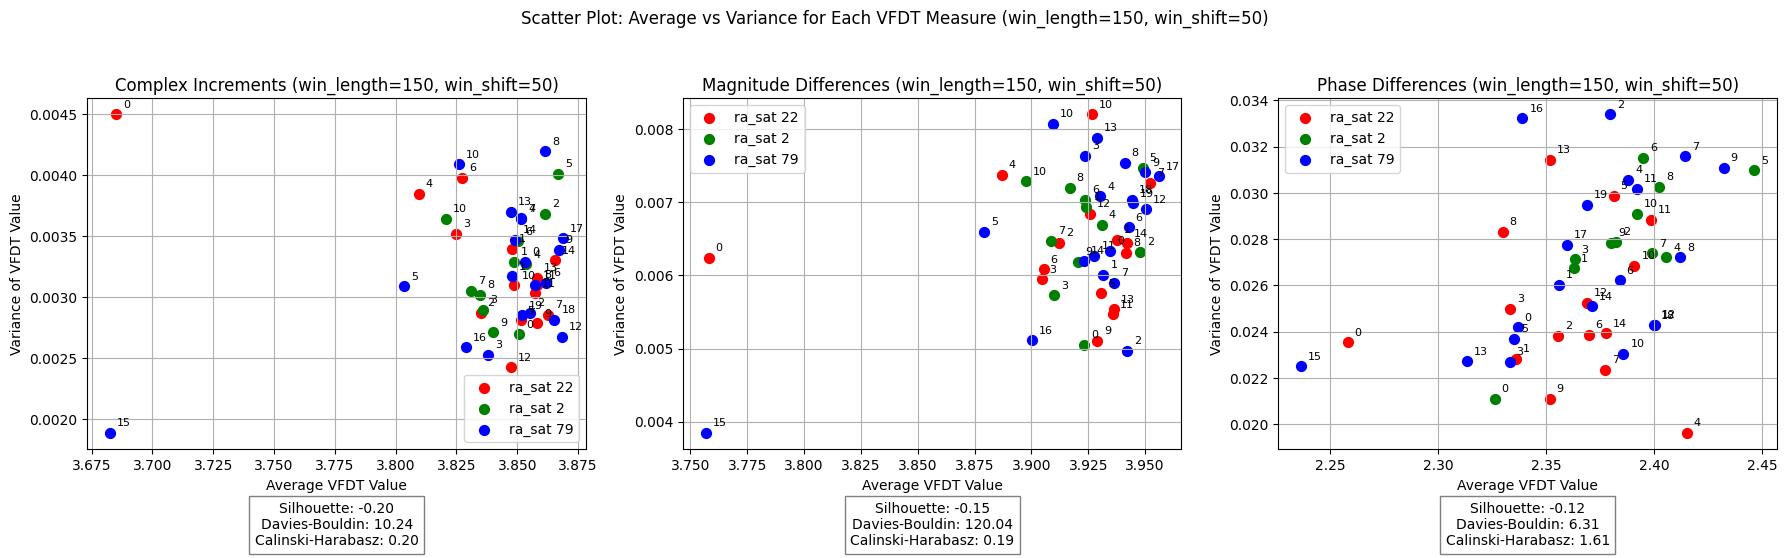

Processing with win_length = 150 and win_shift = 100...


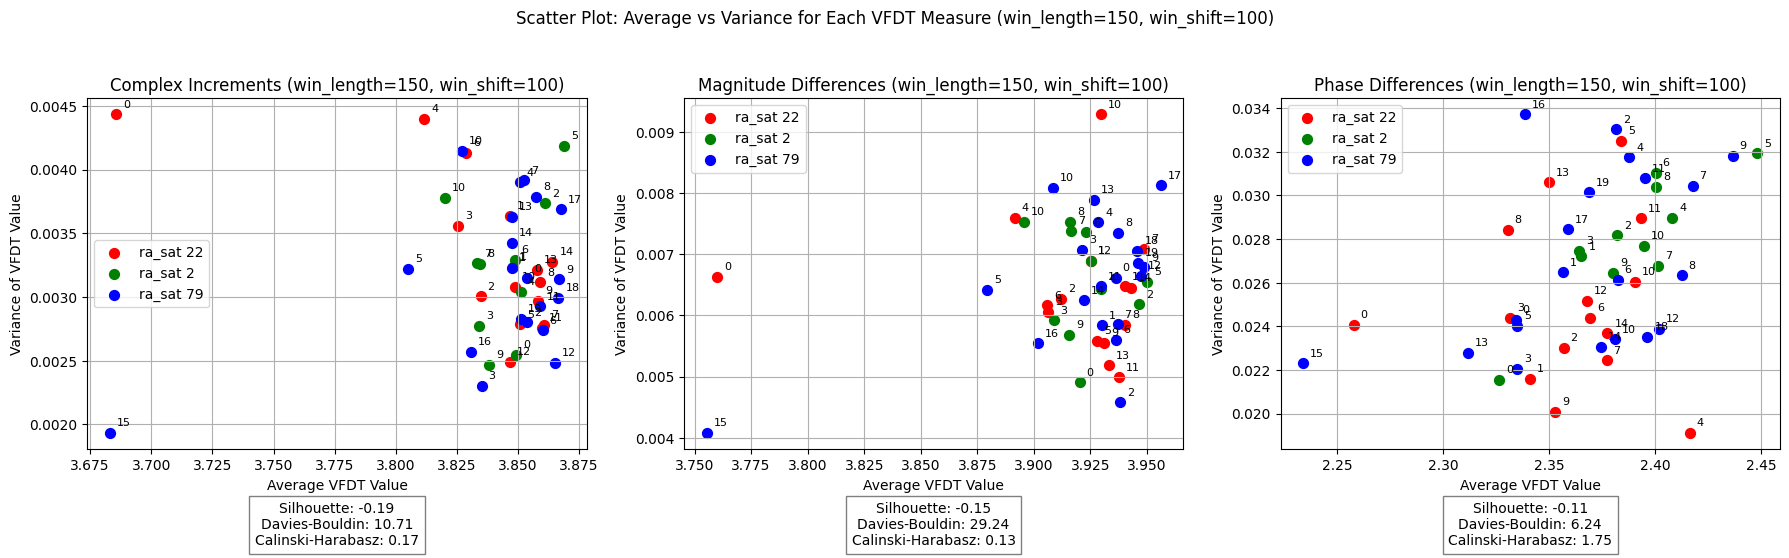

Processing with win_length = 150 and win_shift = 150...


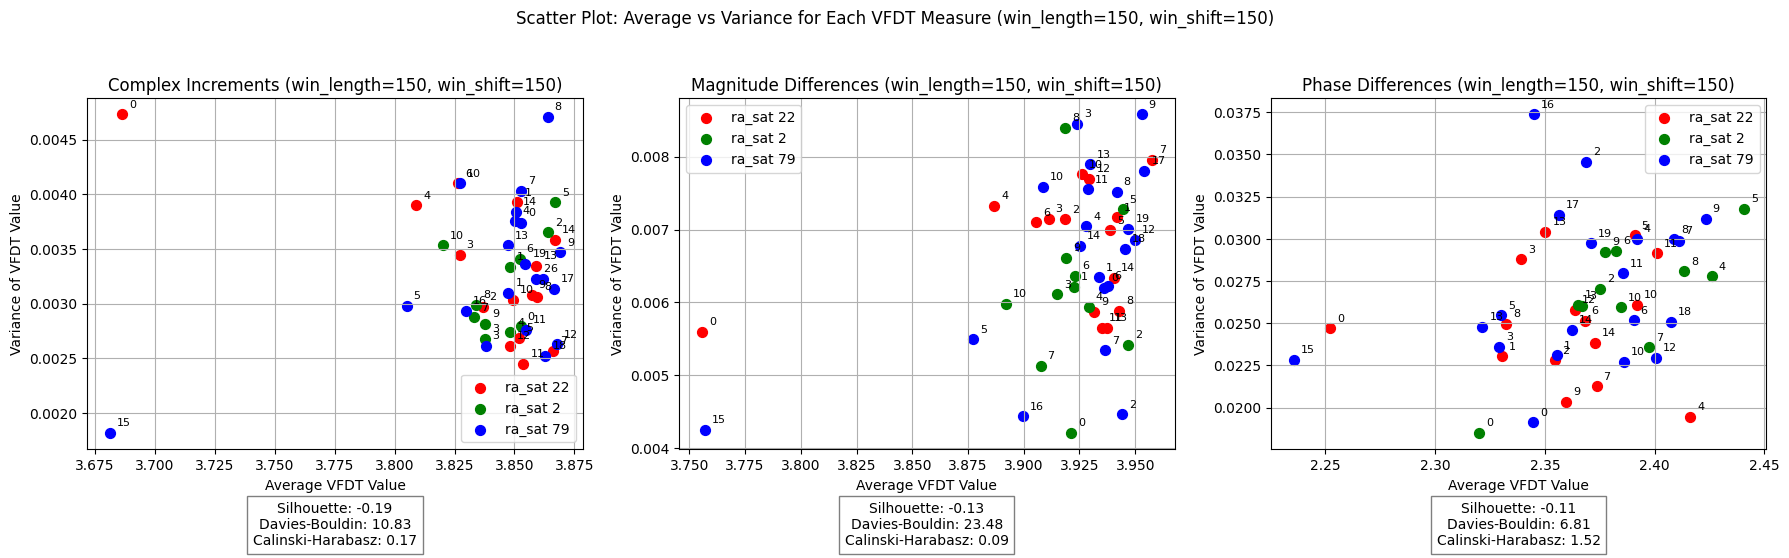

Processing with win_length = 200 and win_shift = 50...


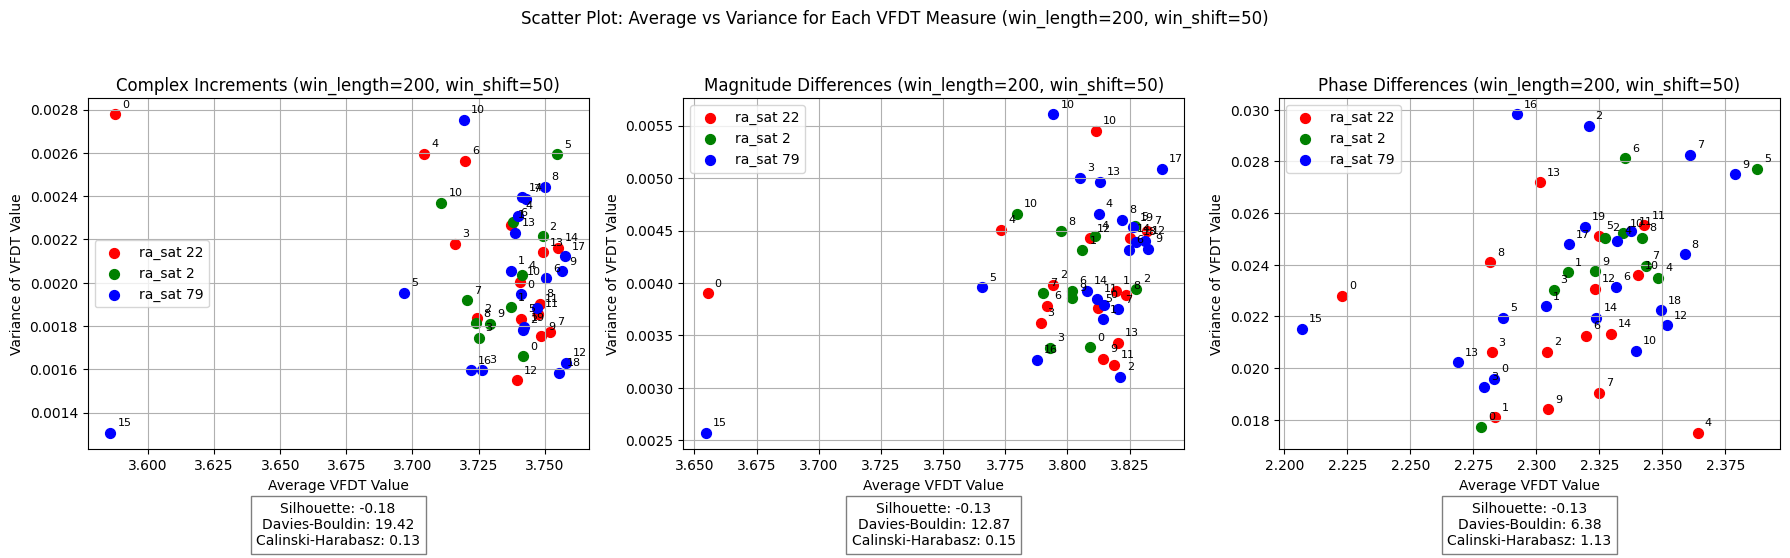

Processing with win_length = 200 and win_shift = 100...


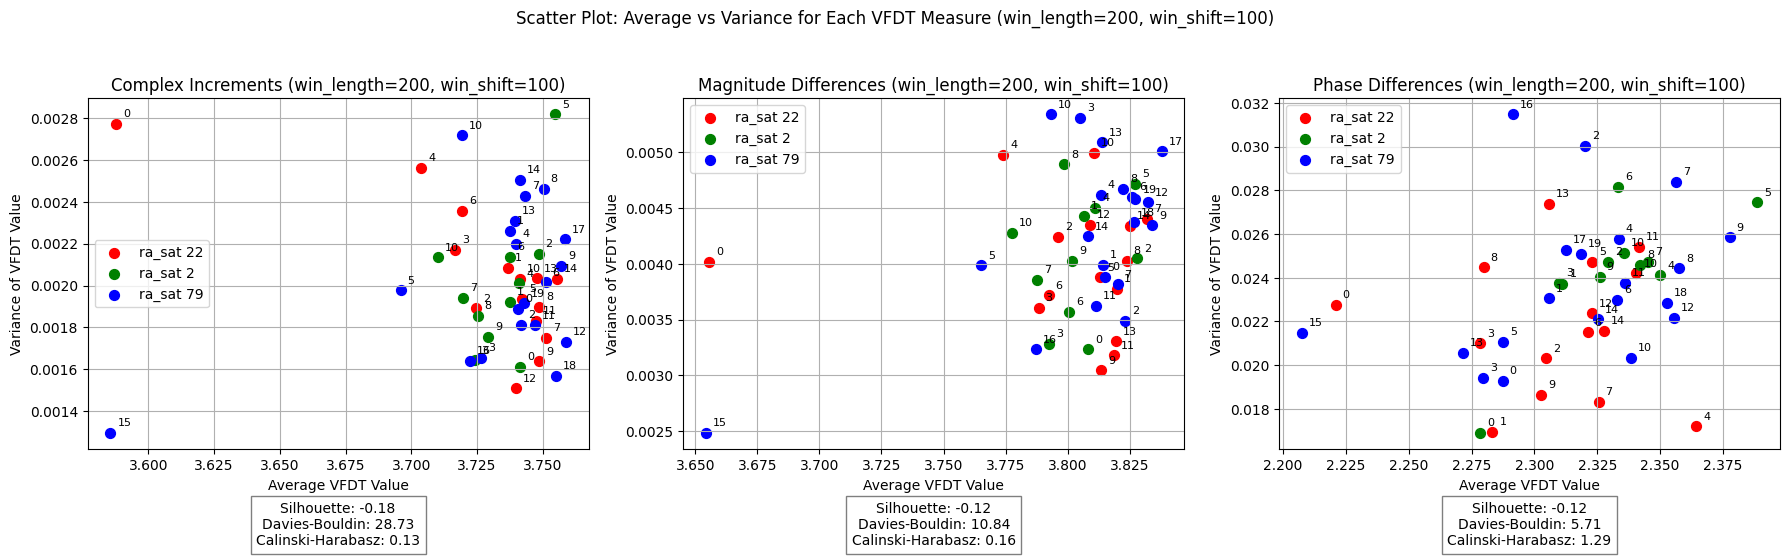

Processing with win_length = 200 and win_shift = 150...


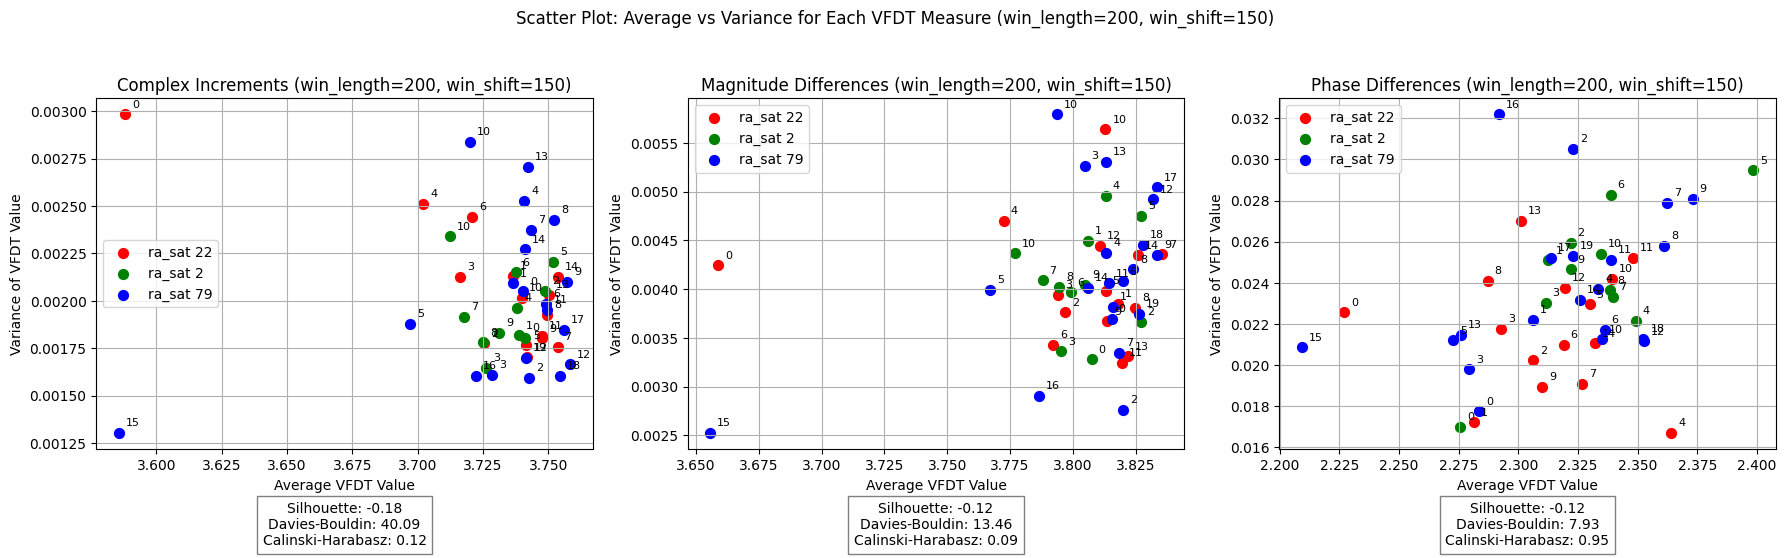

Processing with win_length = 200 and win_shift = 200...


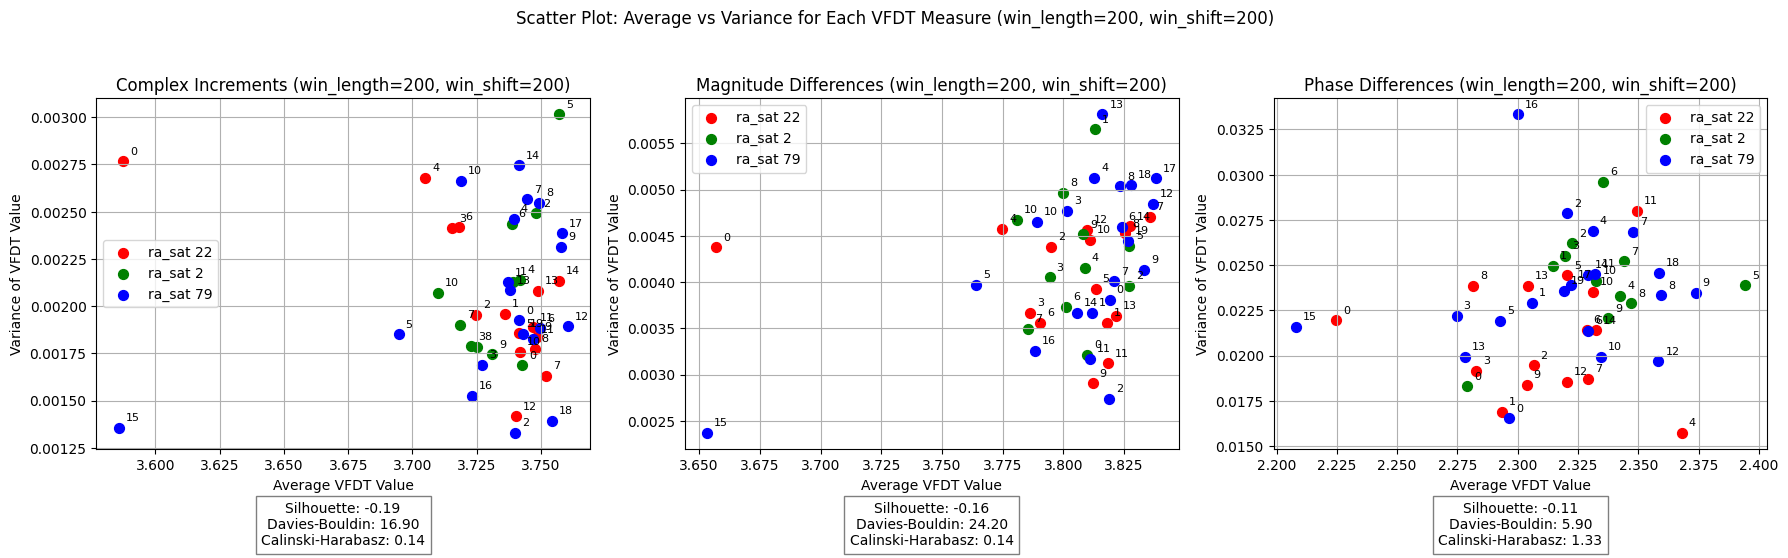

Processing with win_length = 250 and win_shift = 50...


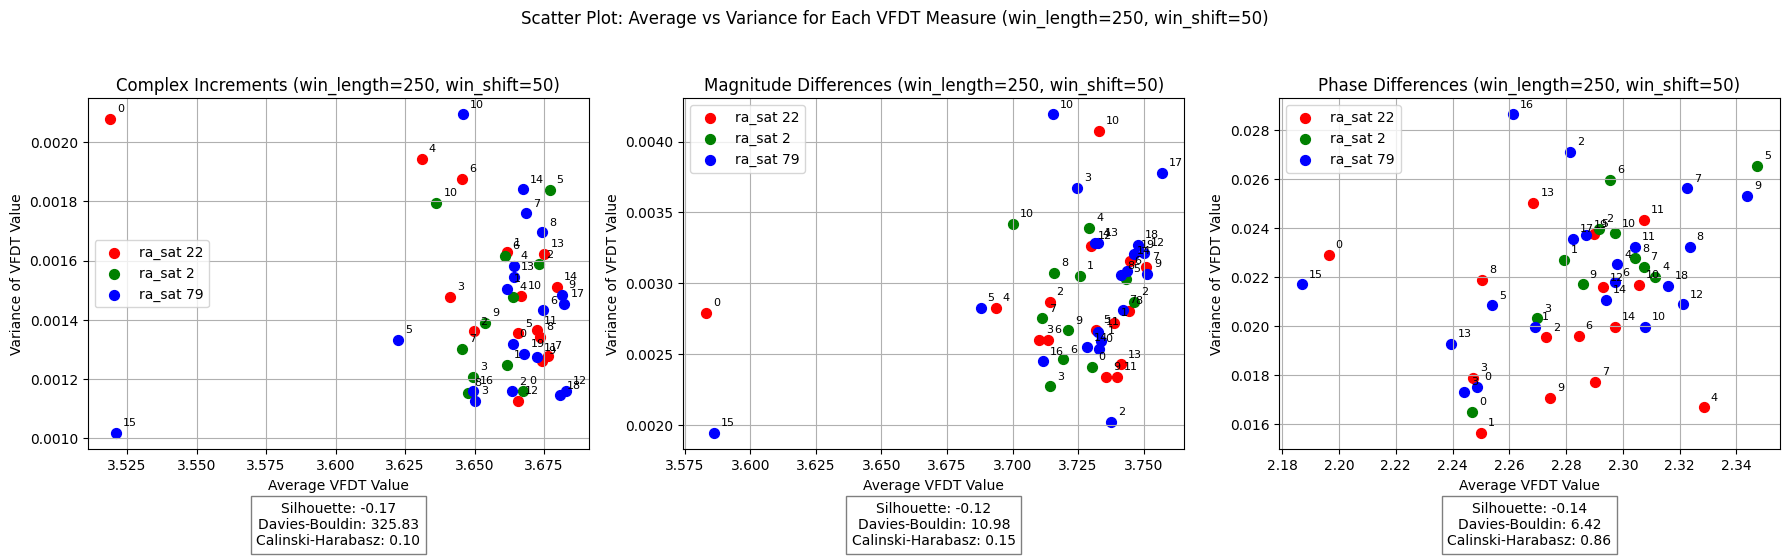

Processing with win_length = 250 and win_shift = 100...


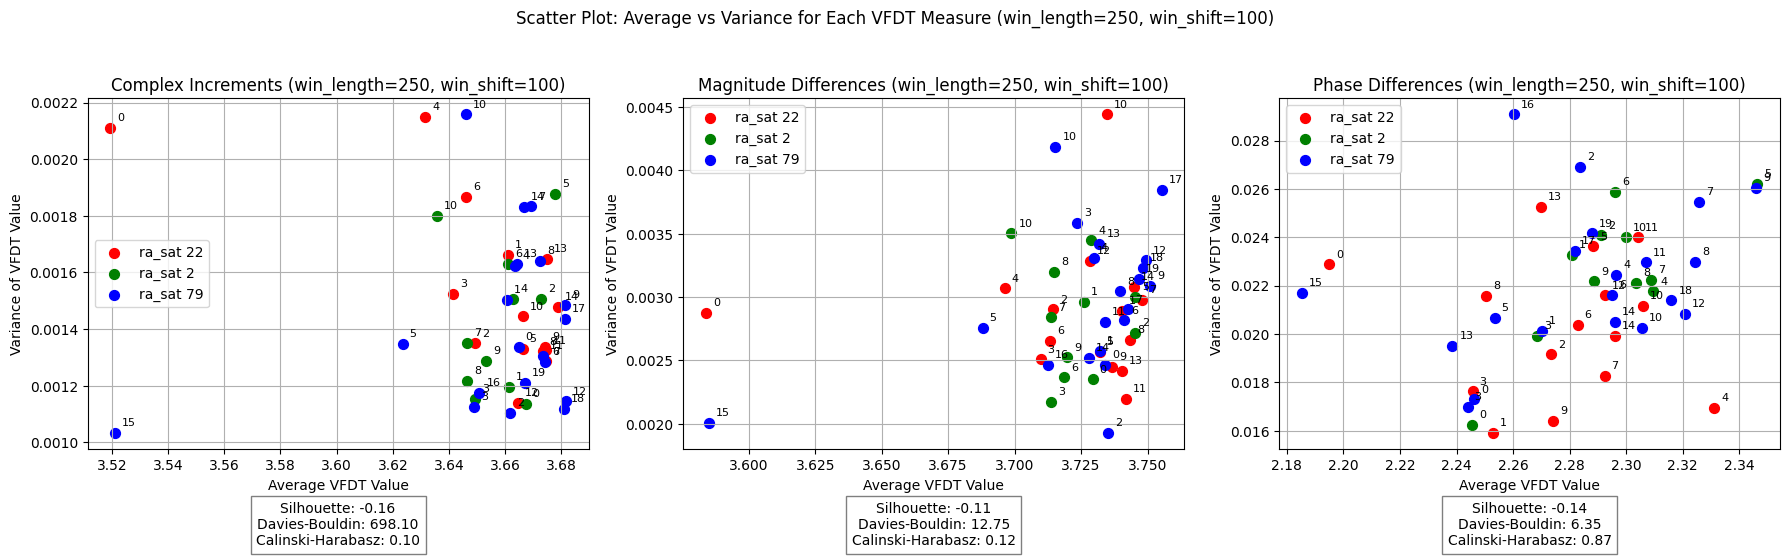

Processing with win_length = 250 and win_shift = 150...


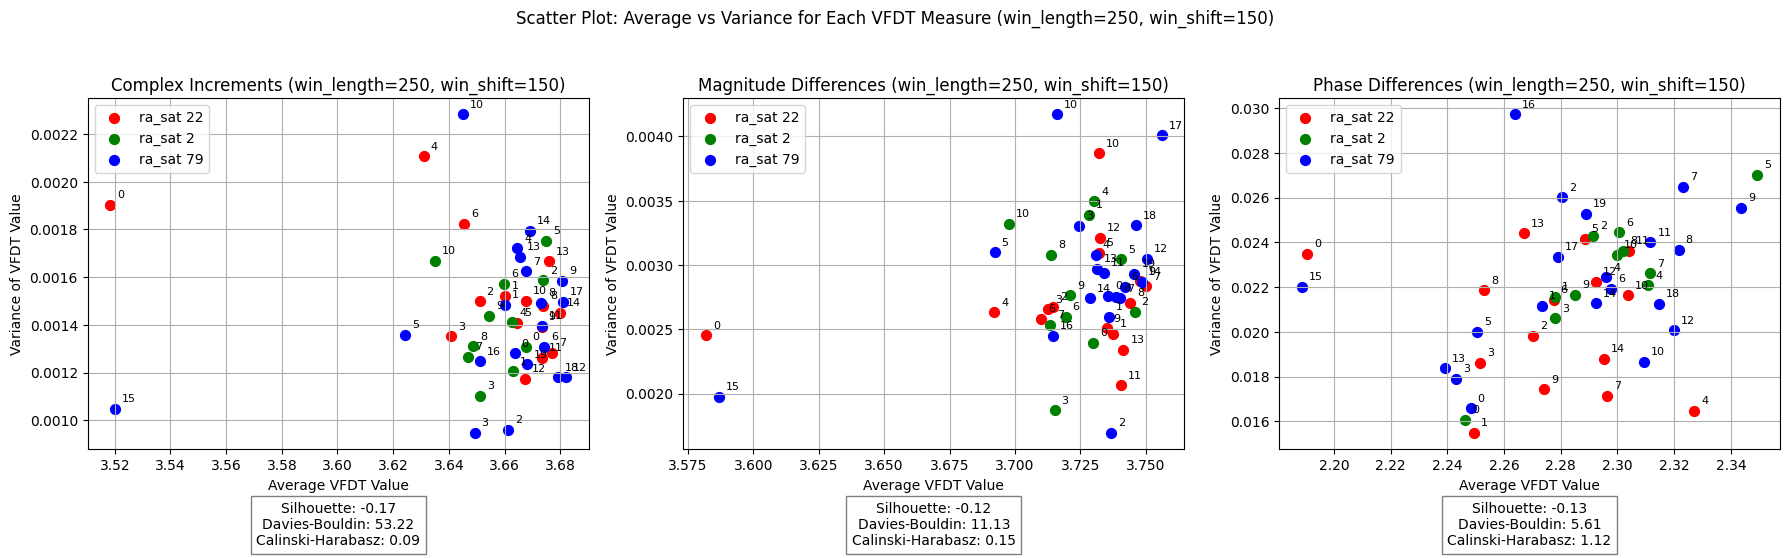

Processing with win_length = 250 and win_shift = 200...


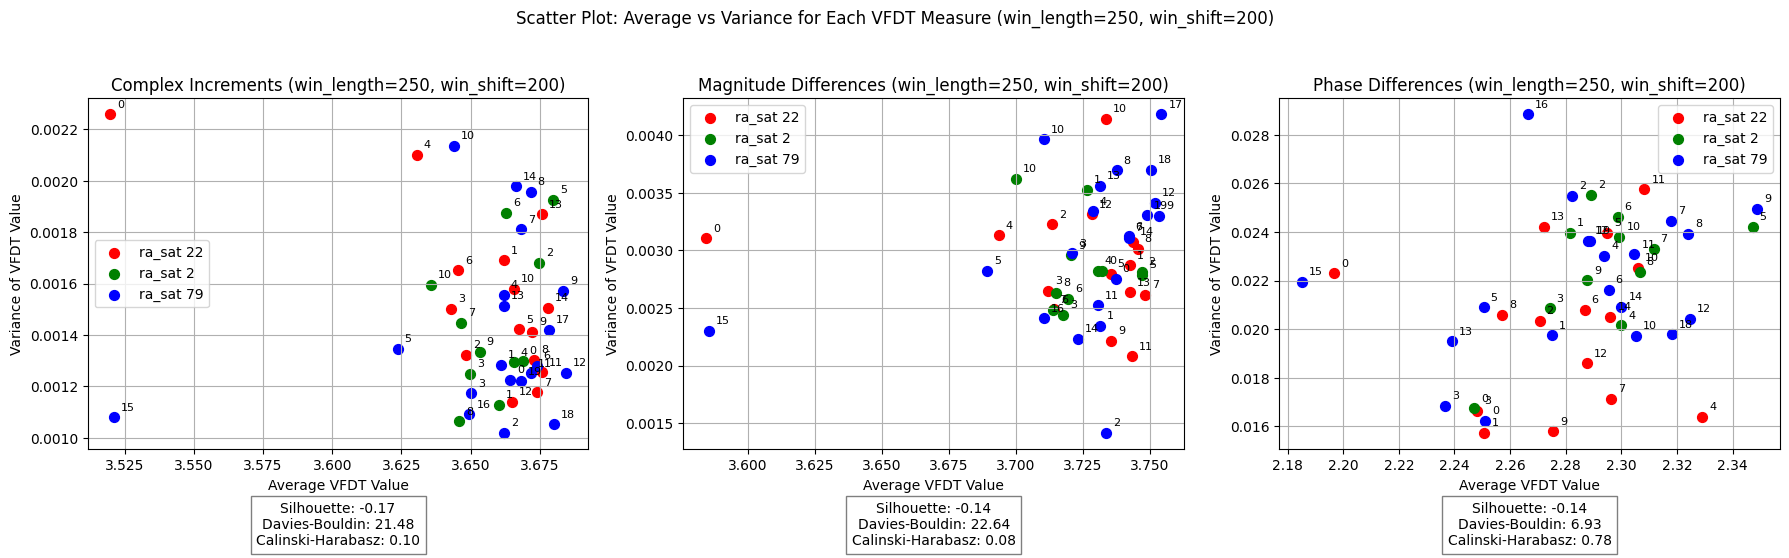

Processing with win_length = 250 and win_shift = 250...


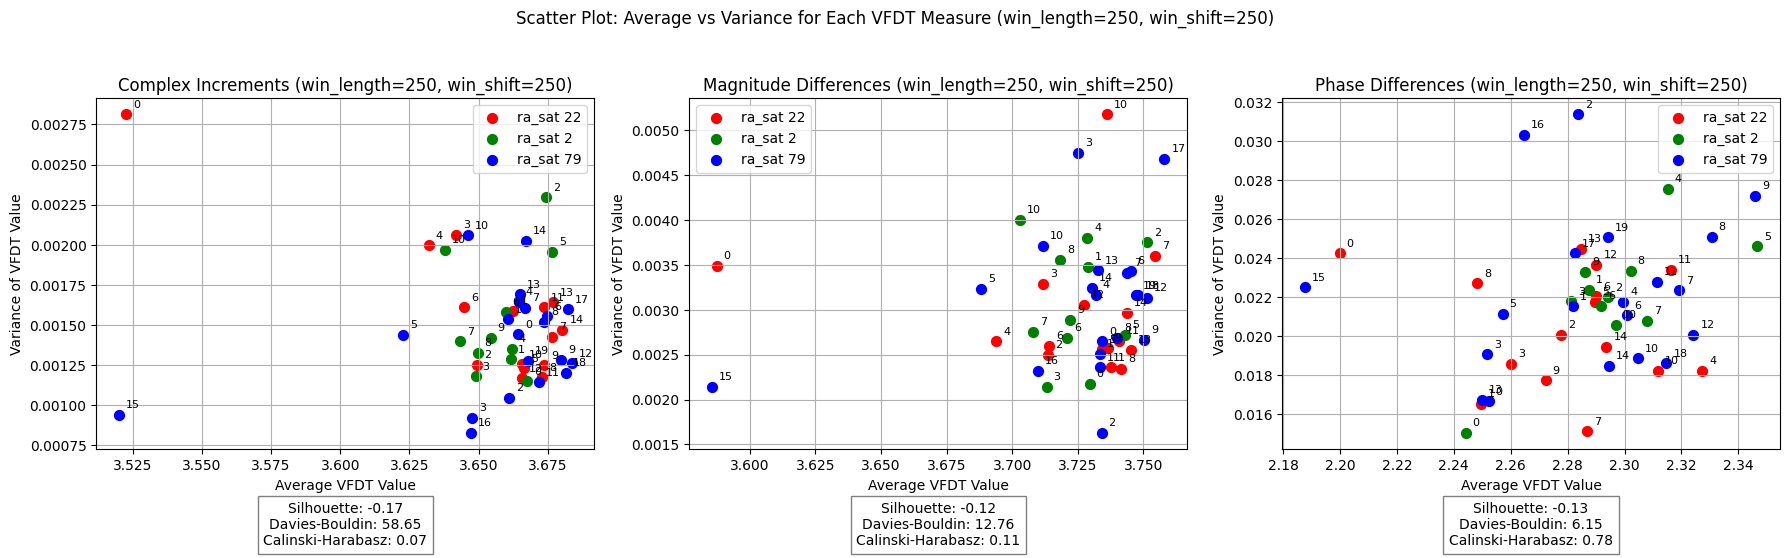

Processing with win_length = 300 and win_shift = 50...


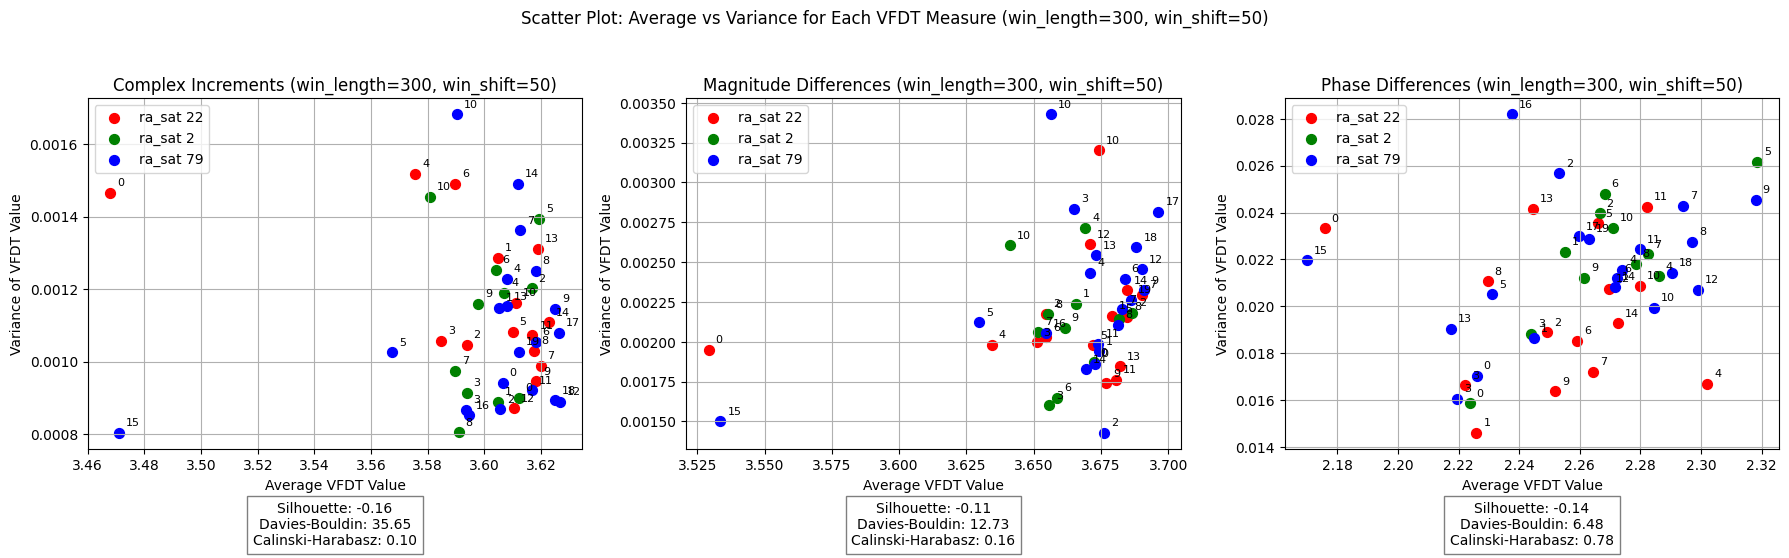

Processing with win_length = 300 and win_shift = 100...


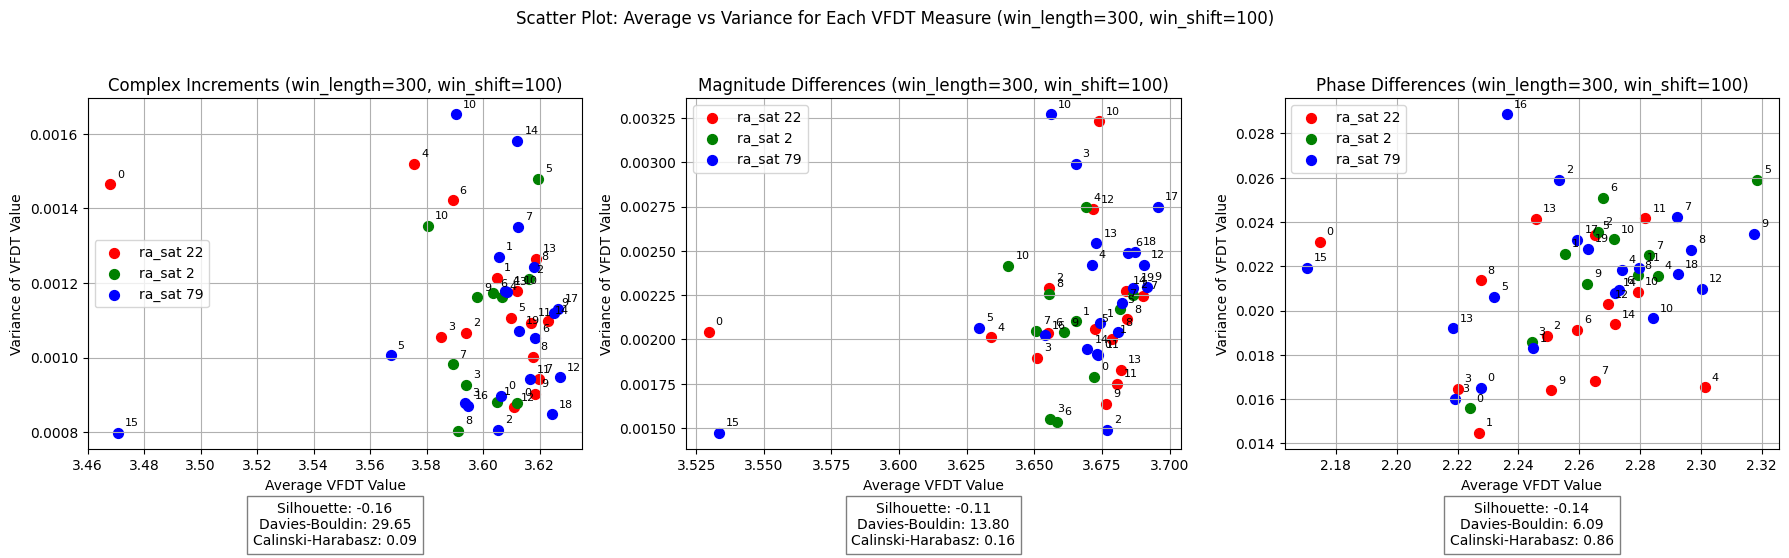

Processing with win_length = 300 and win_shift = 150...


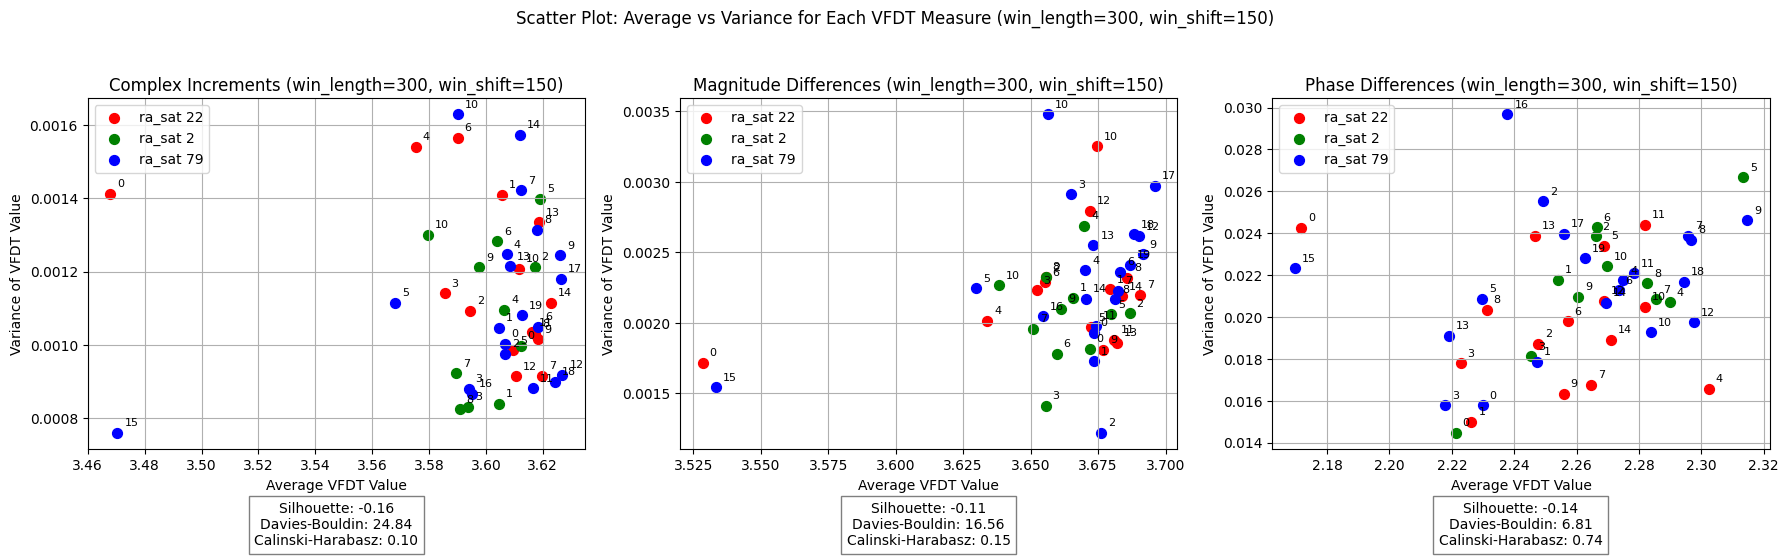

Processing with win_length = 300 and win_shift = 200...


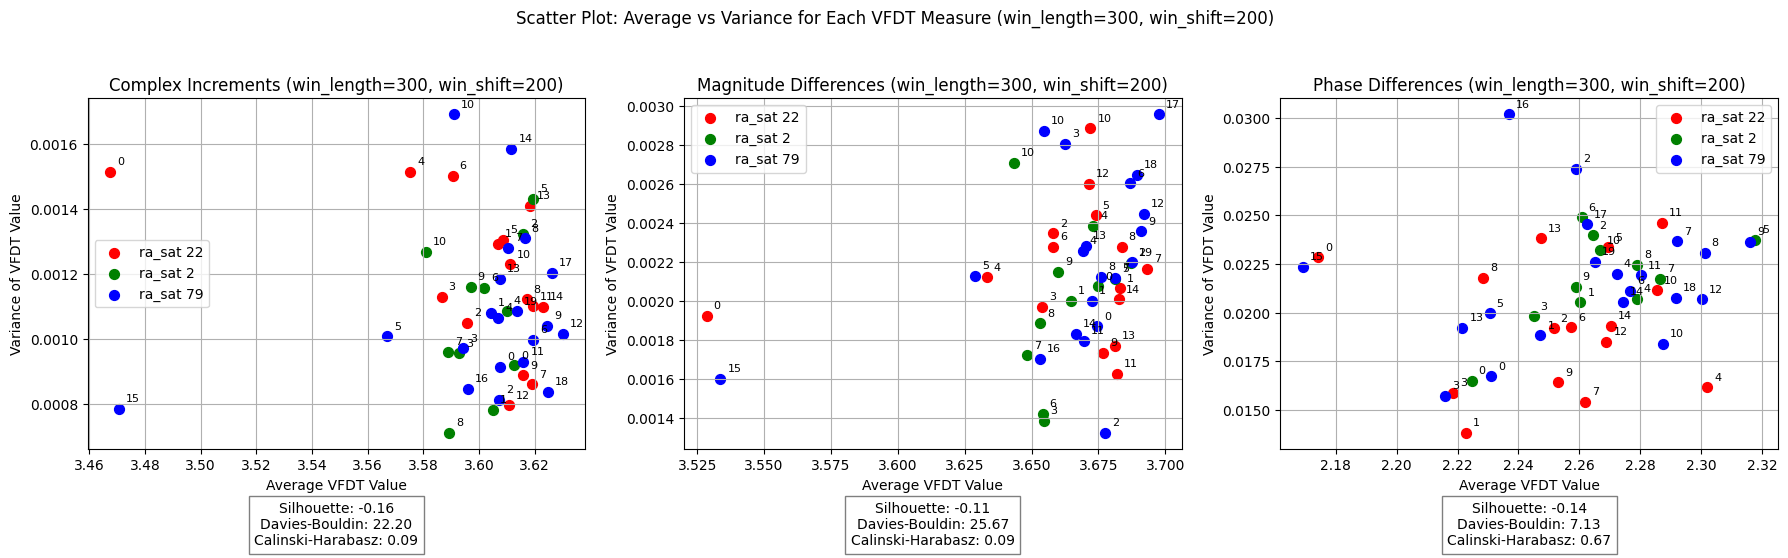

Processing with win_length = 300 and win_shift = 250...


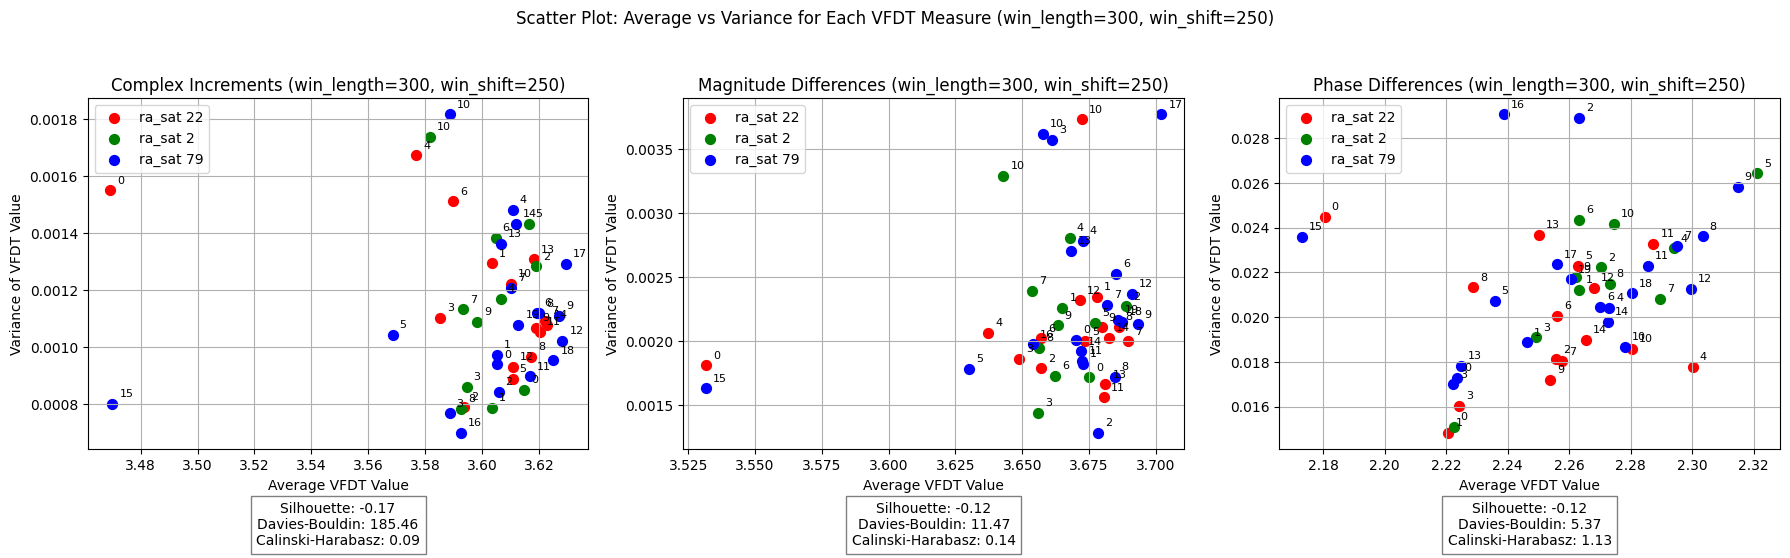

Processing with win_length = 300 and win_shift = 300...


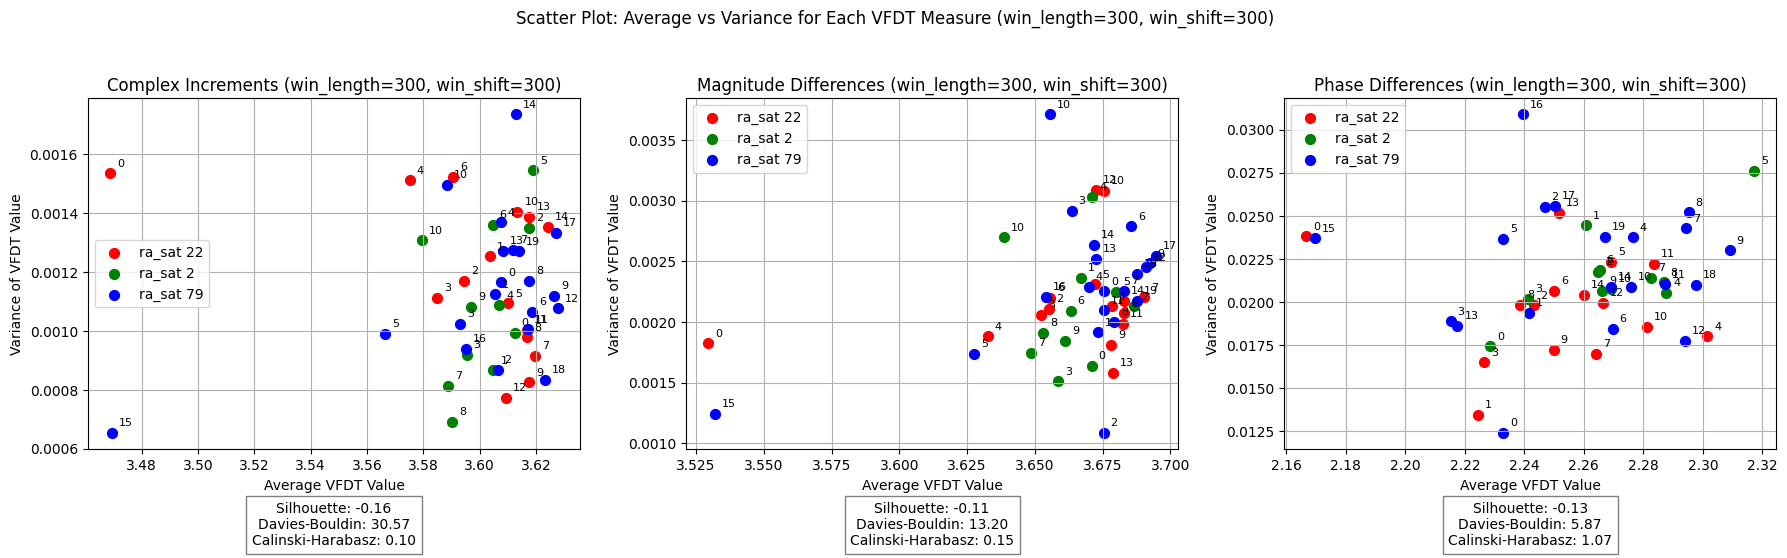

Processing with win_length = 350 and win_shift = 50...


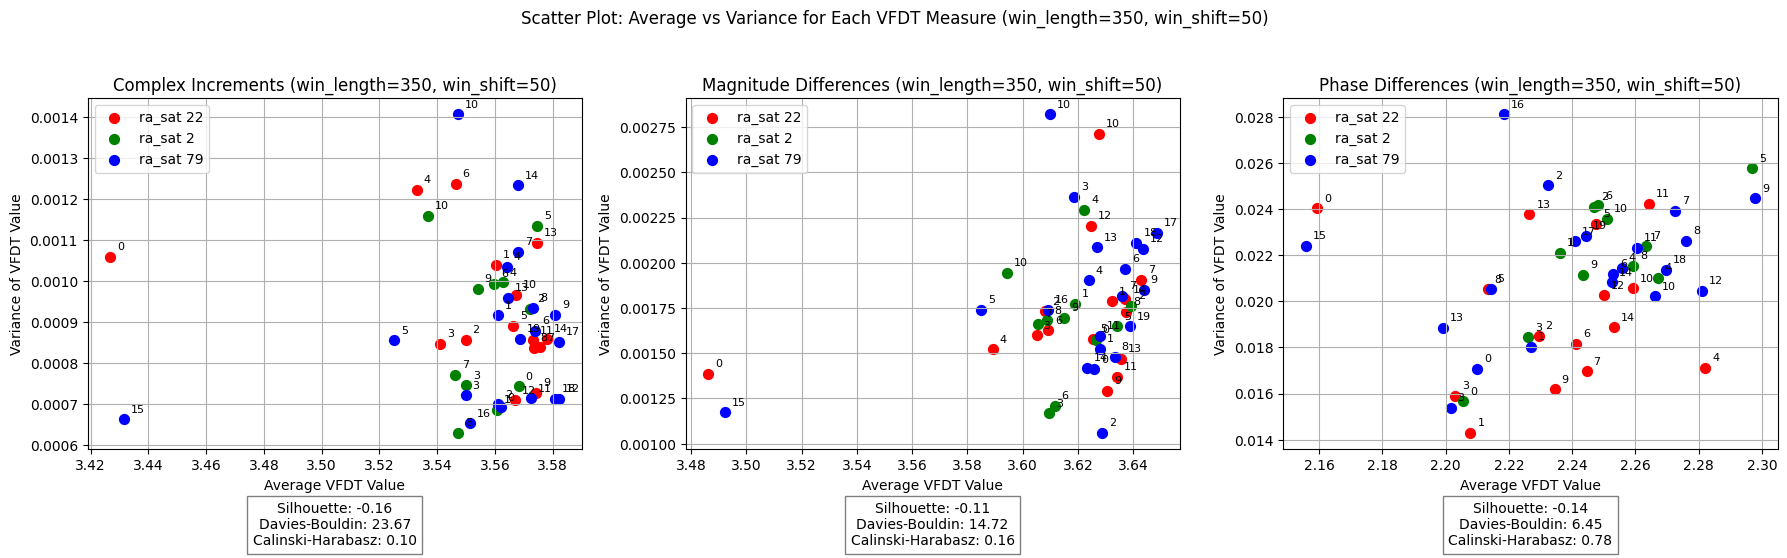

Processing with win_length = 350 and win_shift = 100...


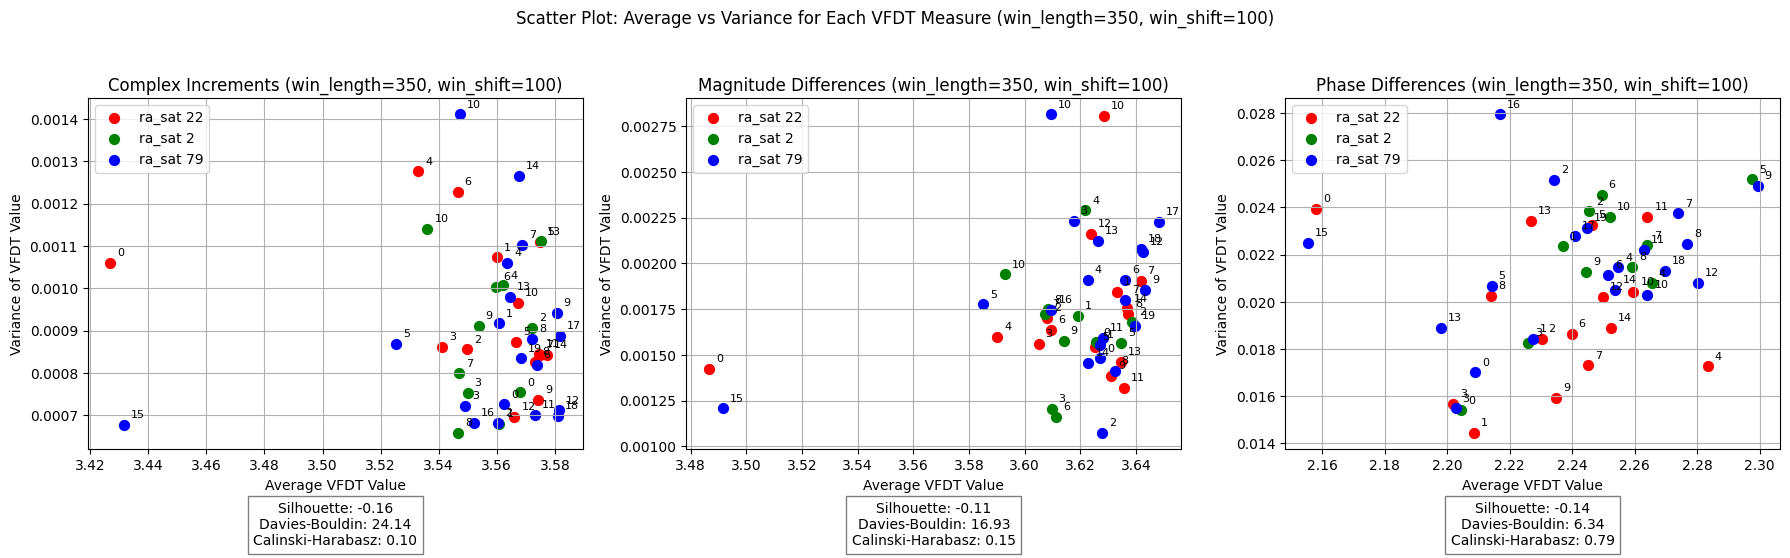

Processing with win_length = 350 and win_shift = 150...


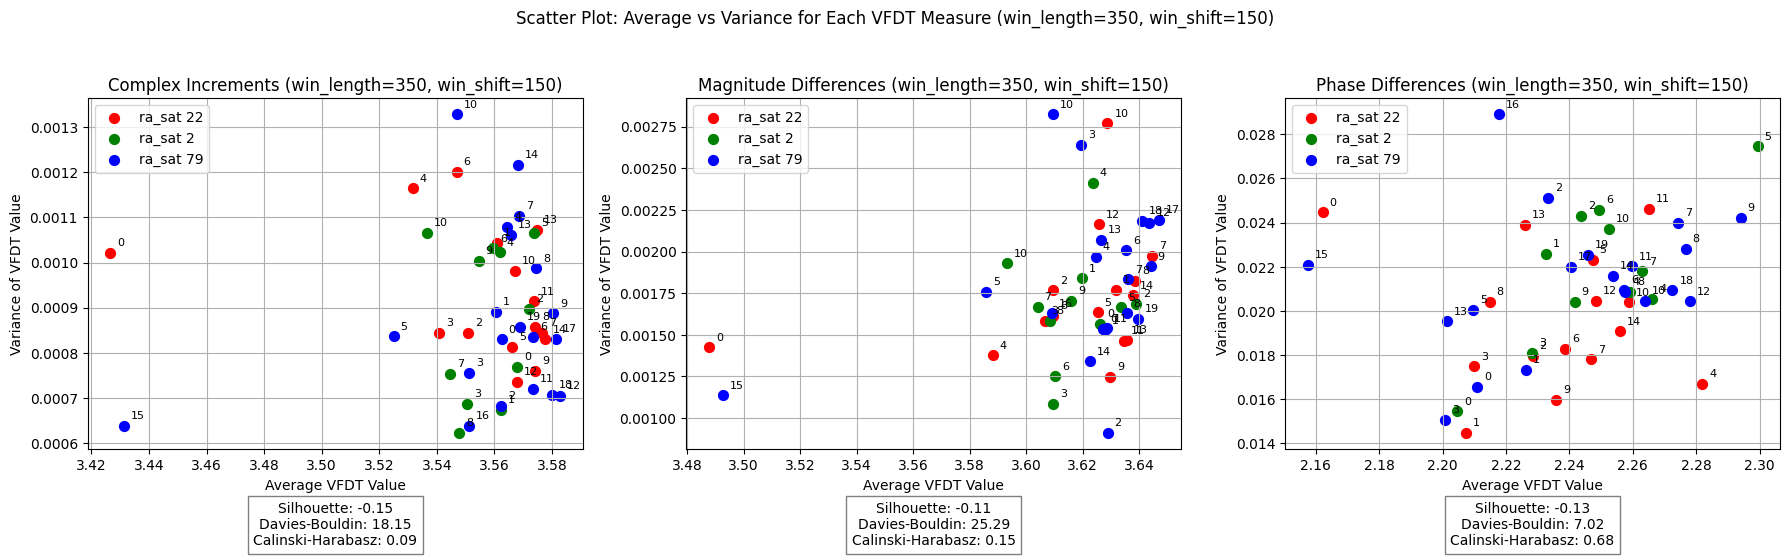

Processing with win_length = 350 and win_shift = 200...


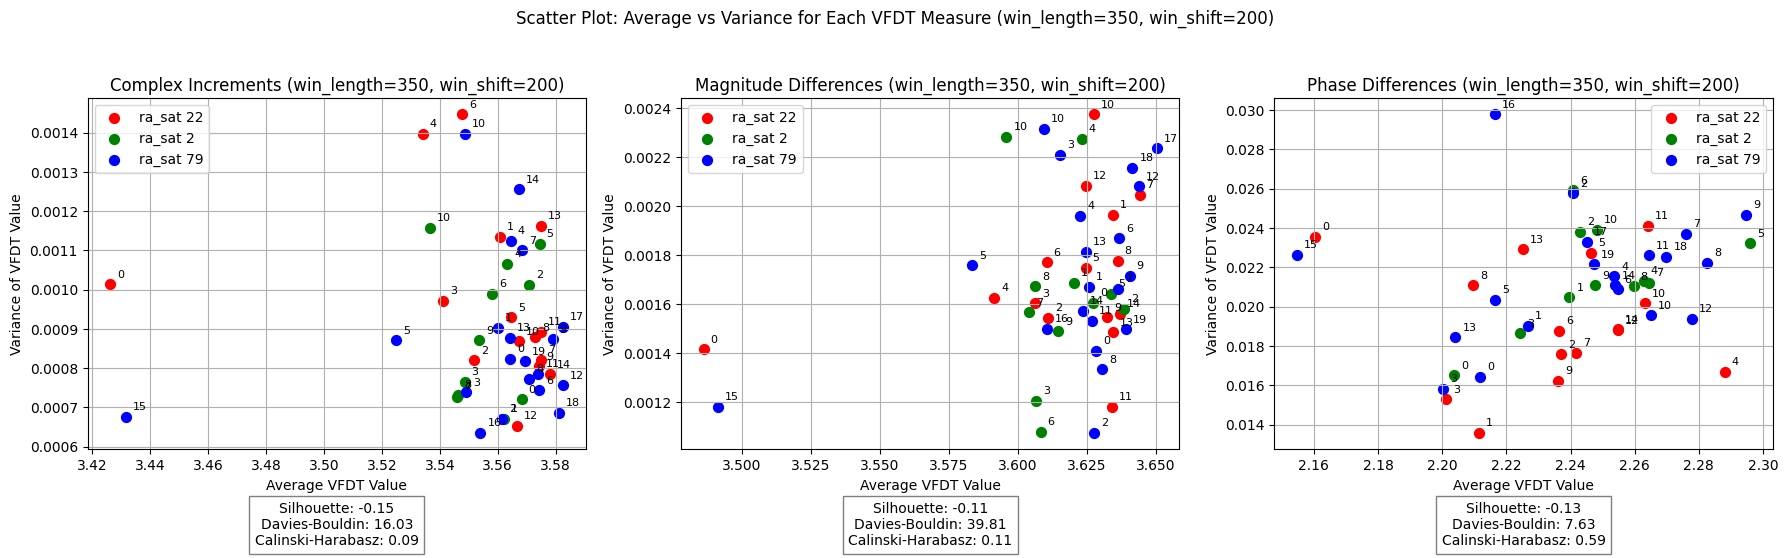

Processing with win_length = 350 and win_shift = 250...


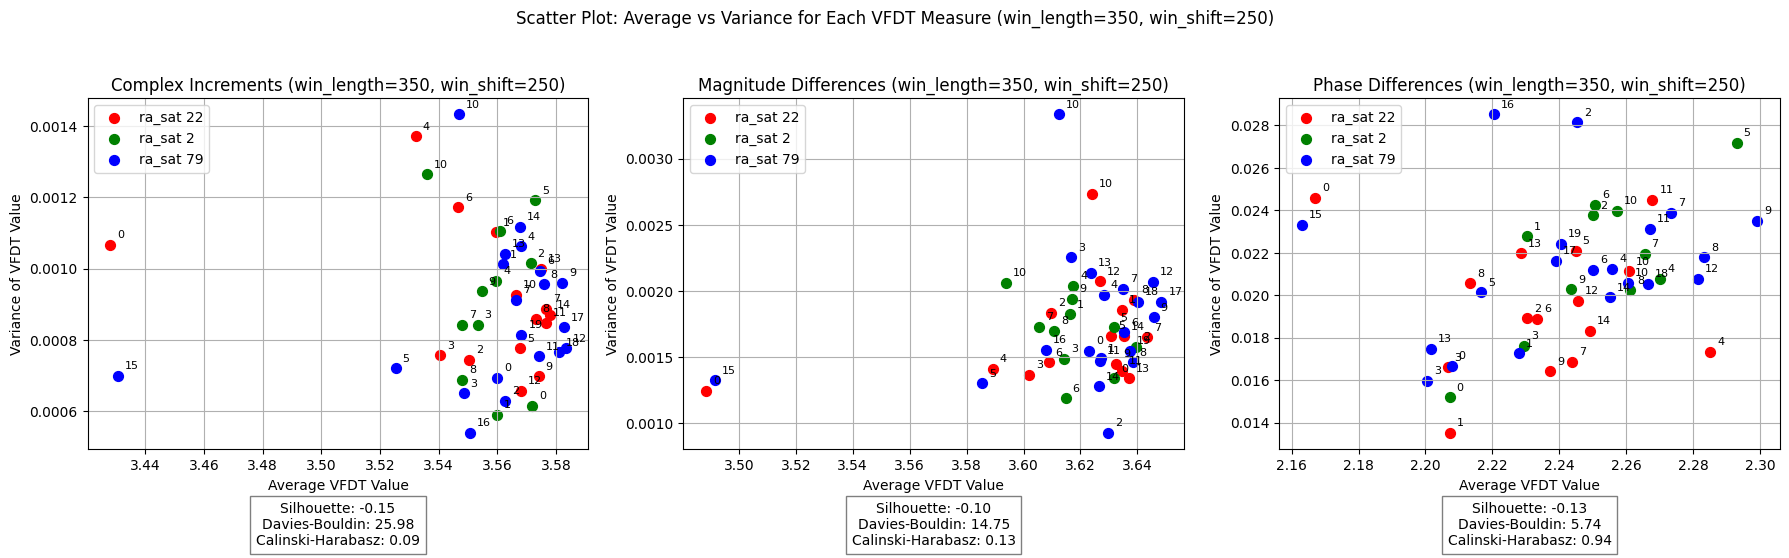

Processing with win_length = 350 and win_shift = 300...


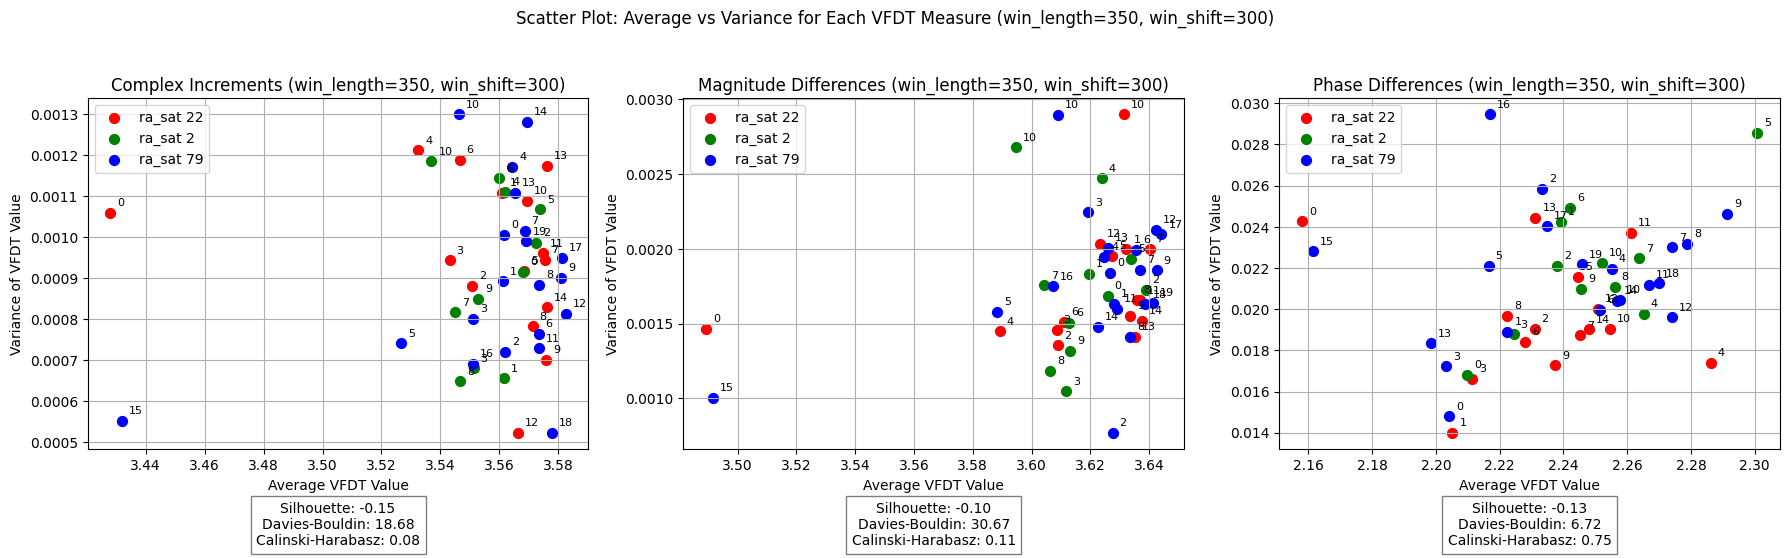

Processing with win_length = 350 and win_shift = 350...


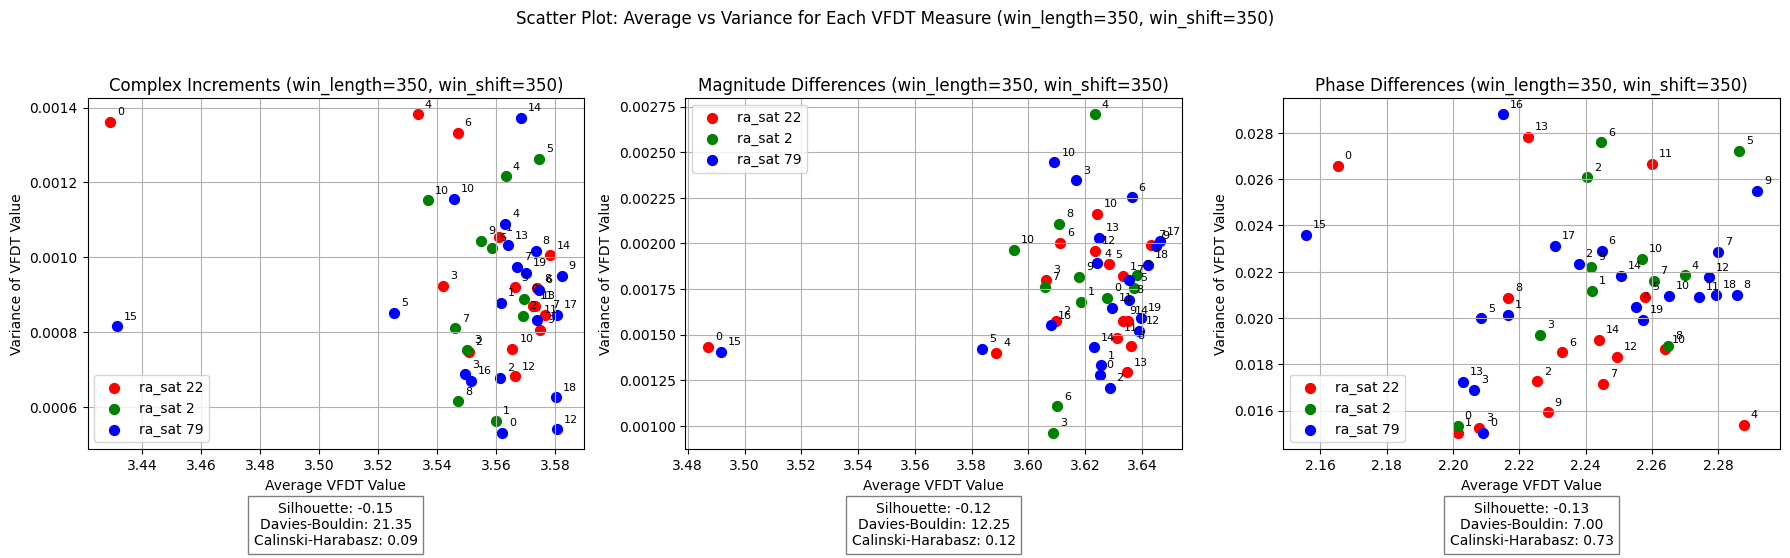

Processing with win_length = 400 and win_shift = 50...


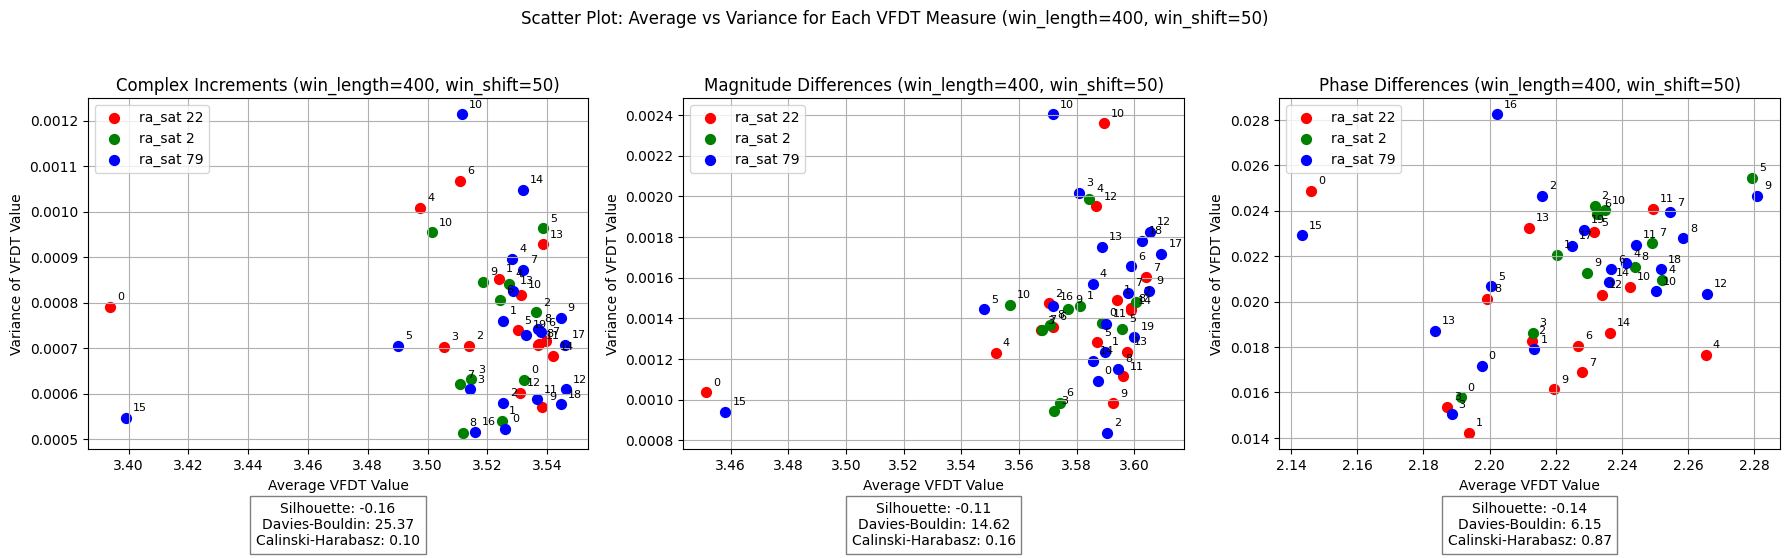

Processing with win_length = 400 and win_shift = 100...


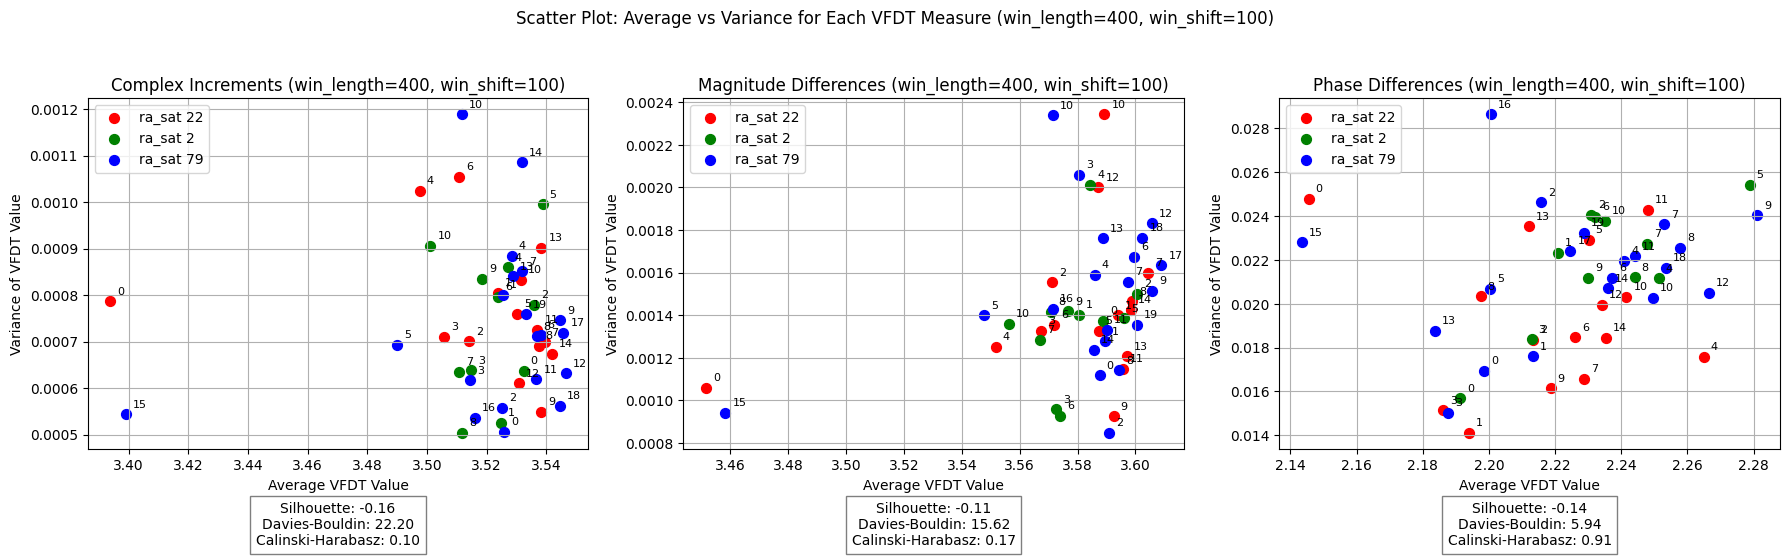

Processing with win_length = 400 and win_shift = 150...


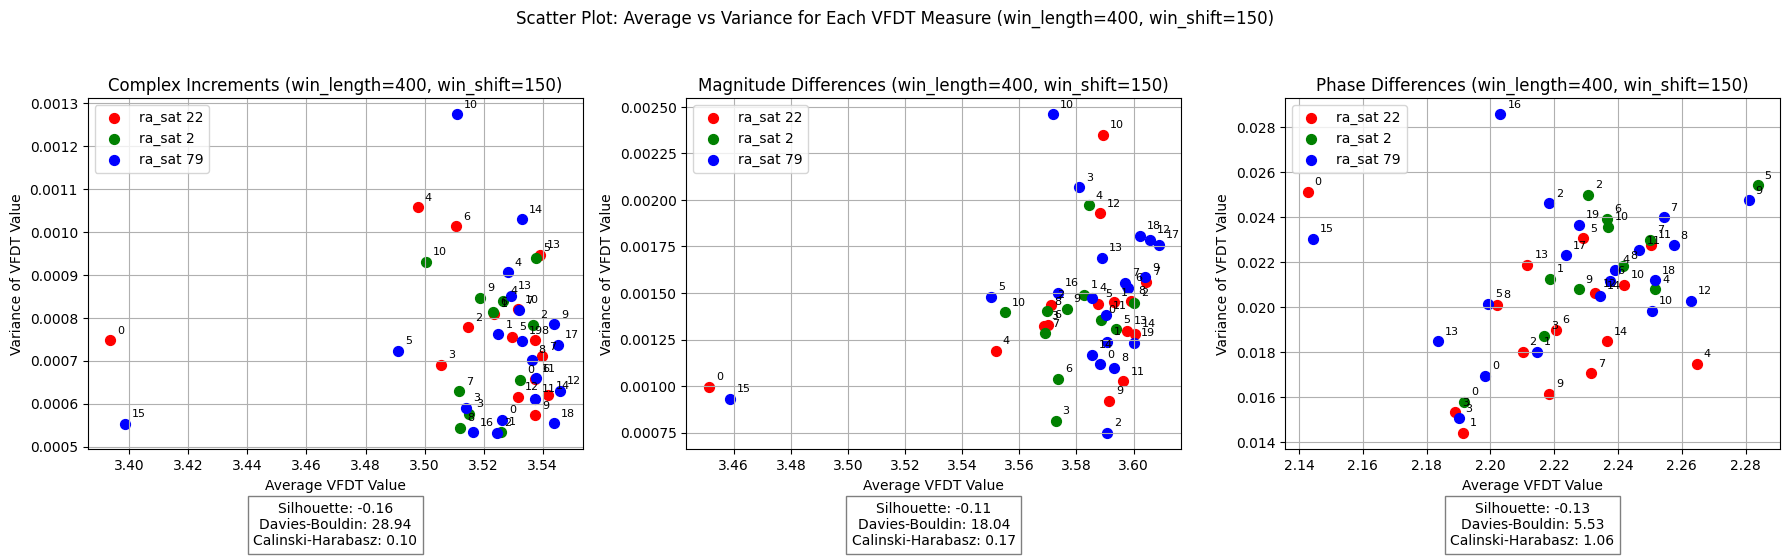

Processing with win_length = 400 and win_shift = 200...


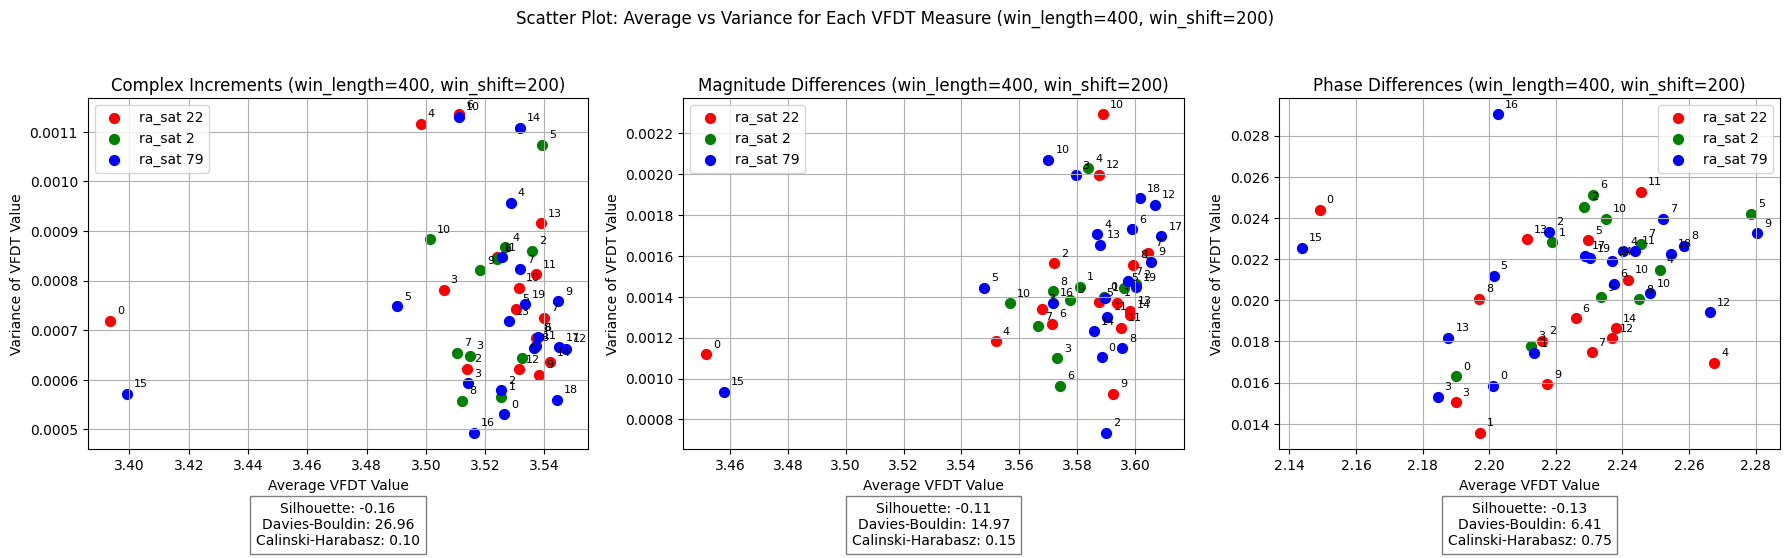

Processing with win_length = 400 and win_shift = 250...


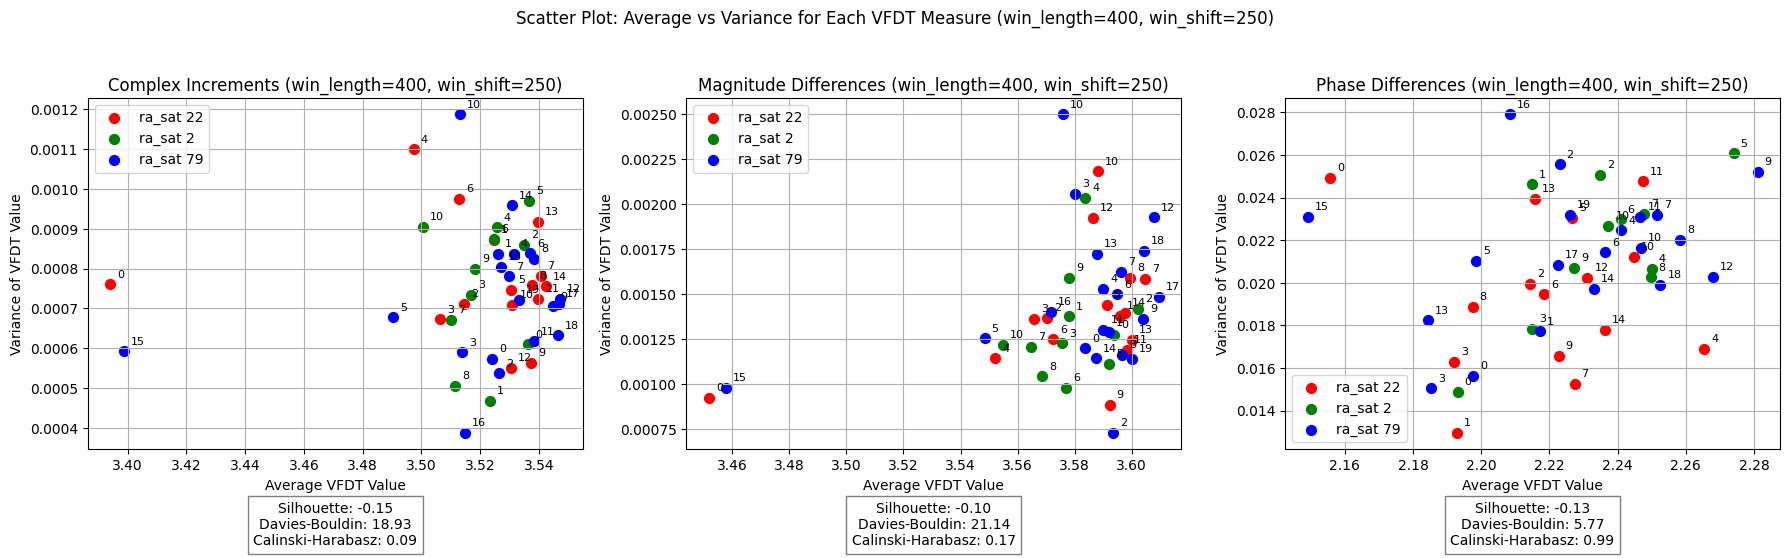

Processing with win_length = 400 and win_shift = 300...


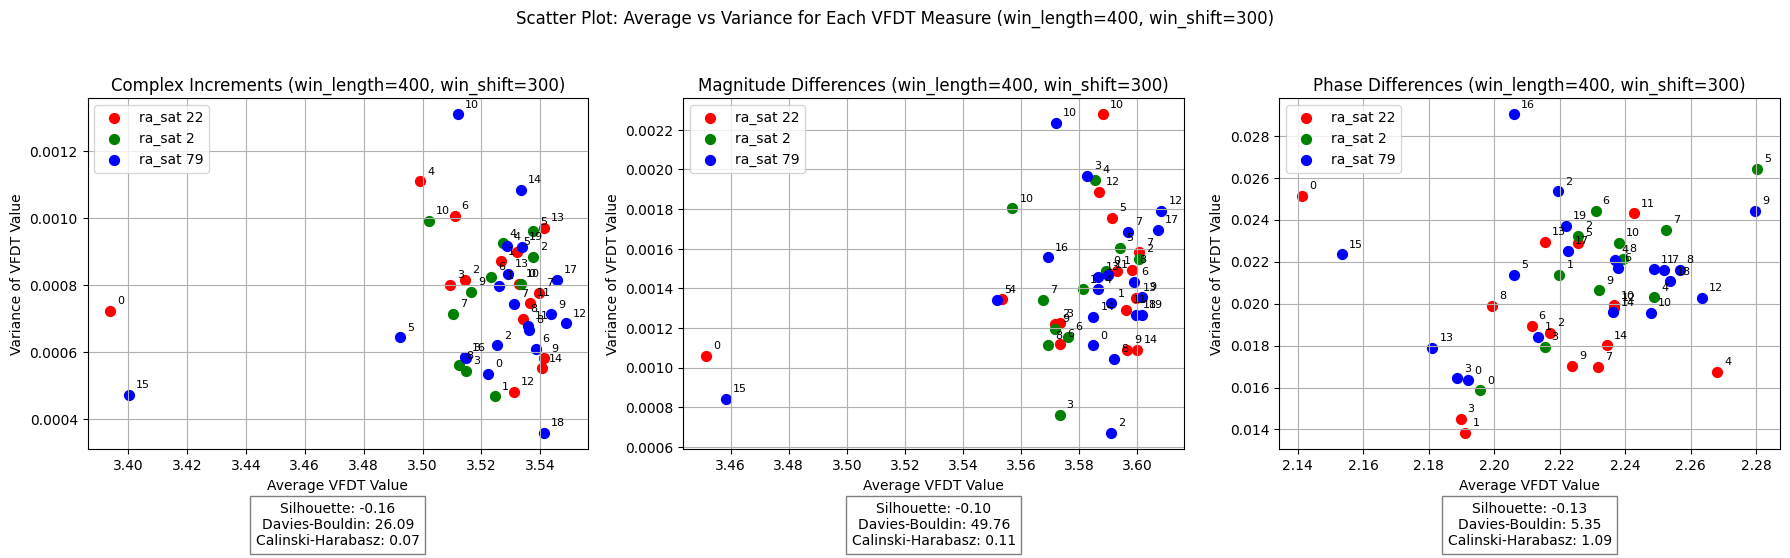

Processing with win_length = 400 and win_shift = 350...


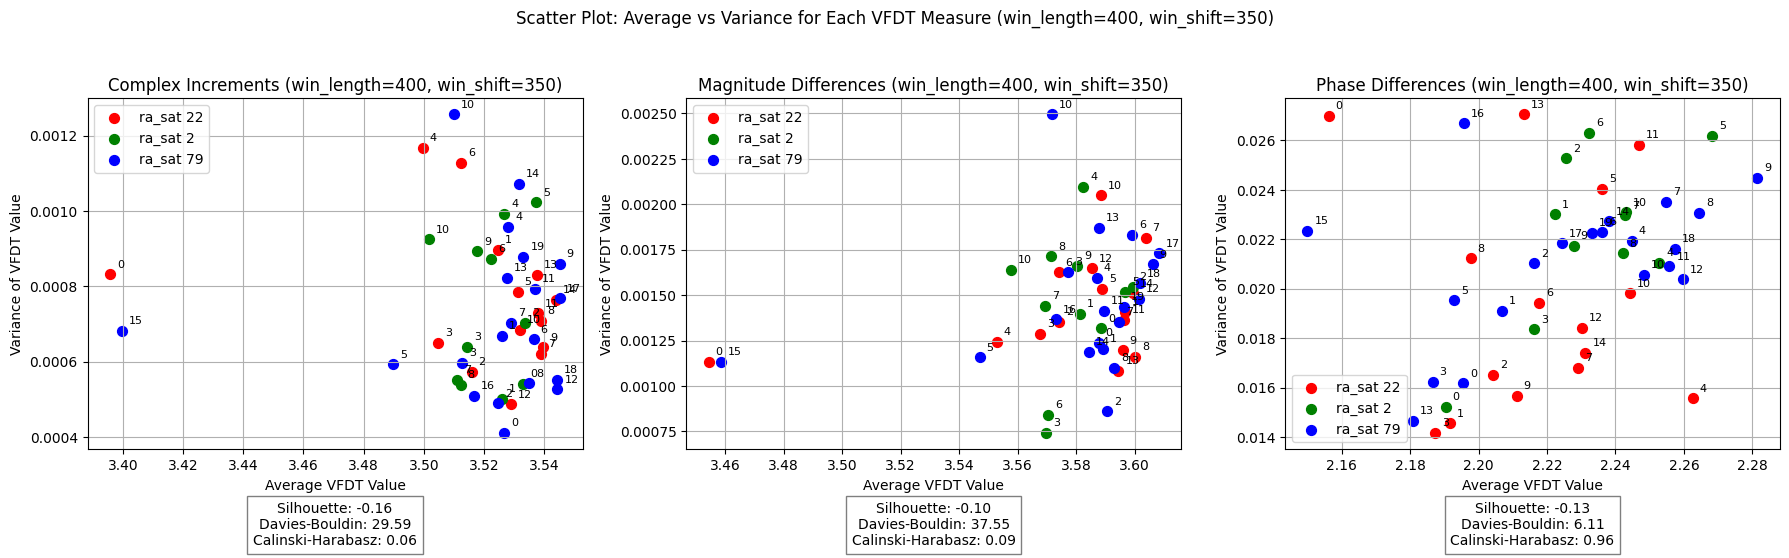

Processing with win_length = 400 and win_shift = 400...


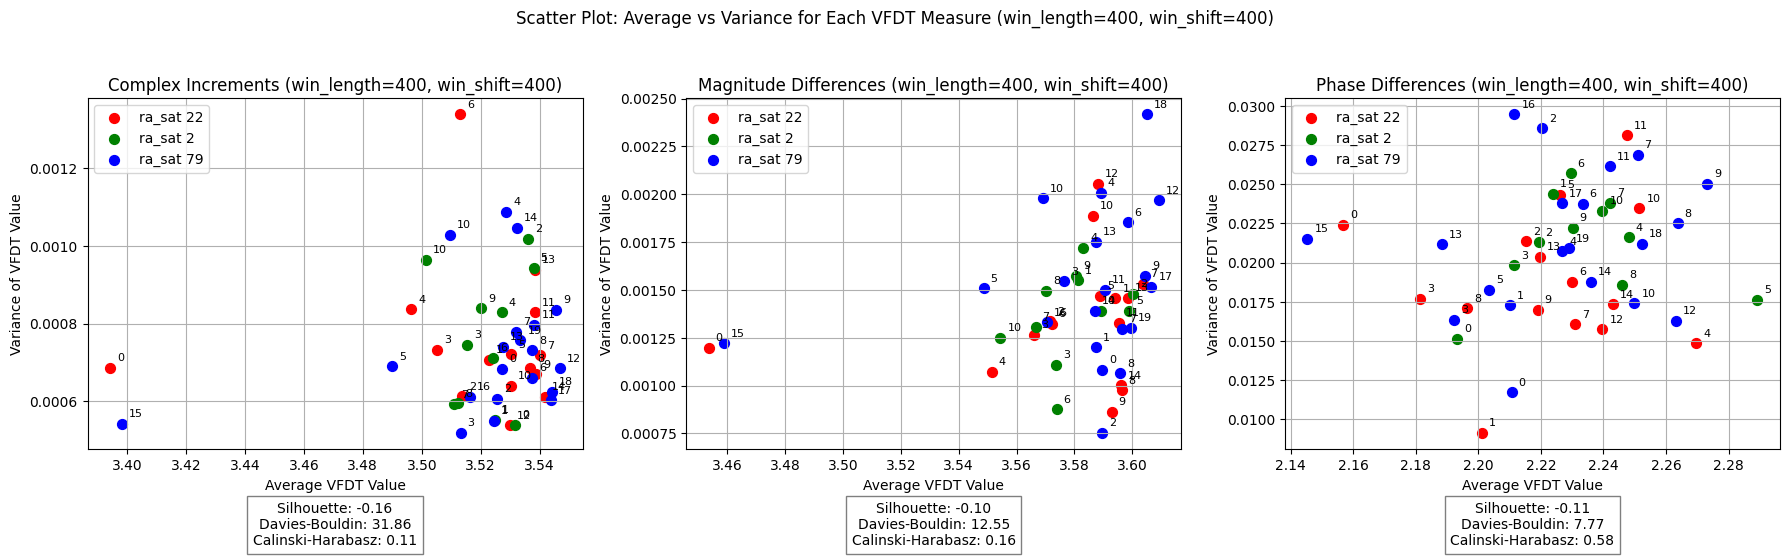

Processing with win_length = 450 and win_shift = 50...


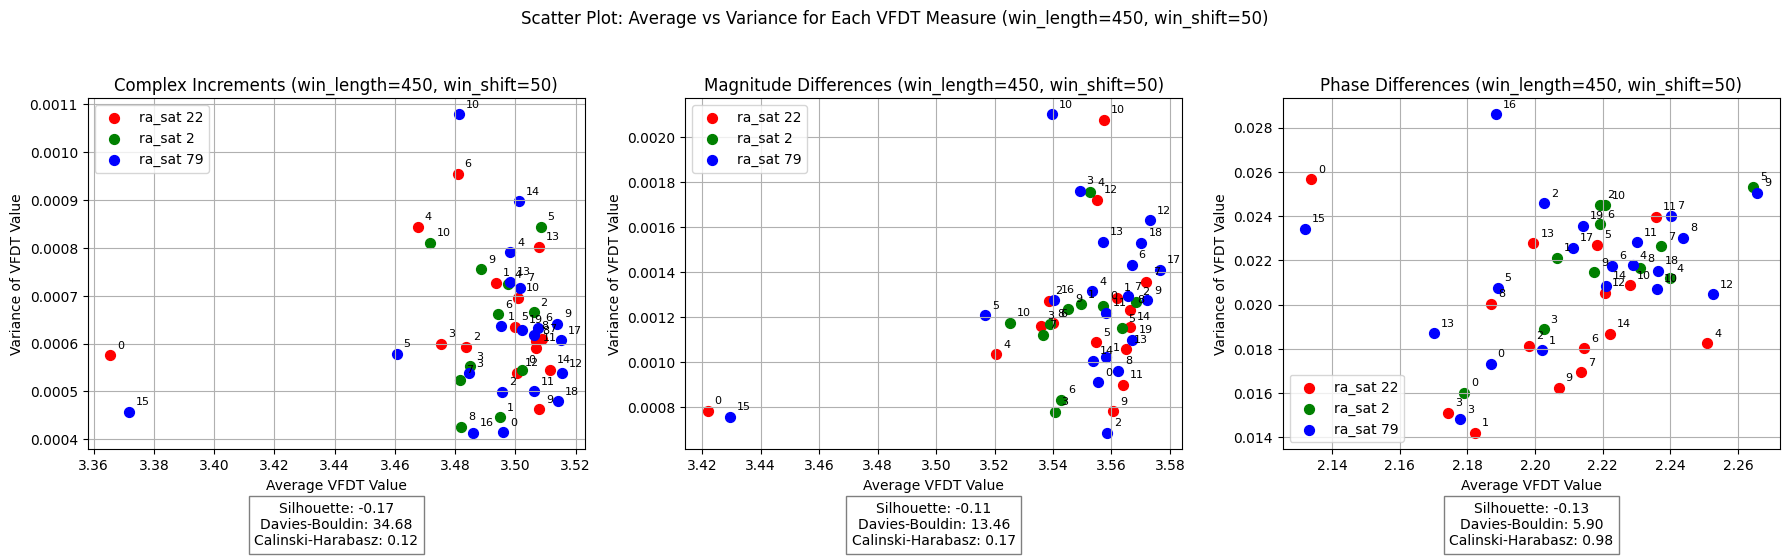

Processing with win_length = 450 and win_shift = 100...


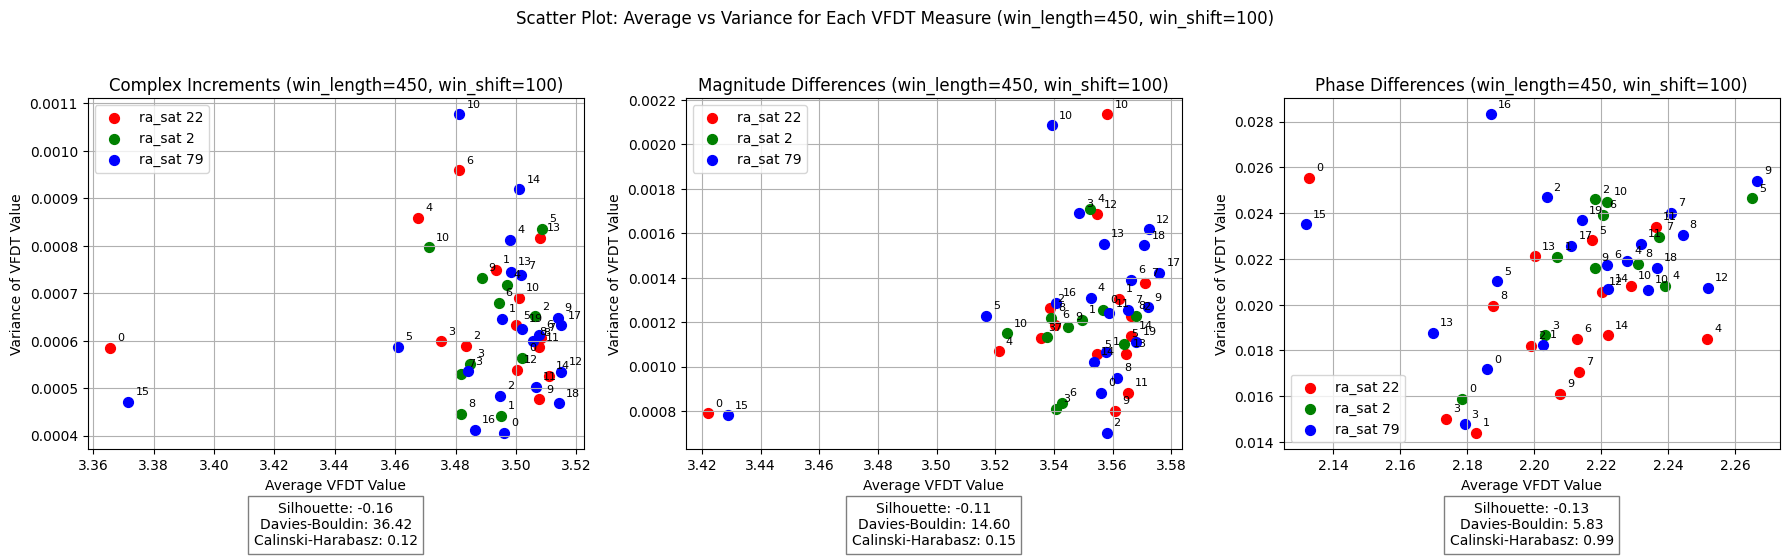

Processing with win_length = 450 and win_shift = 150...


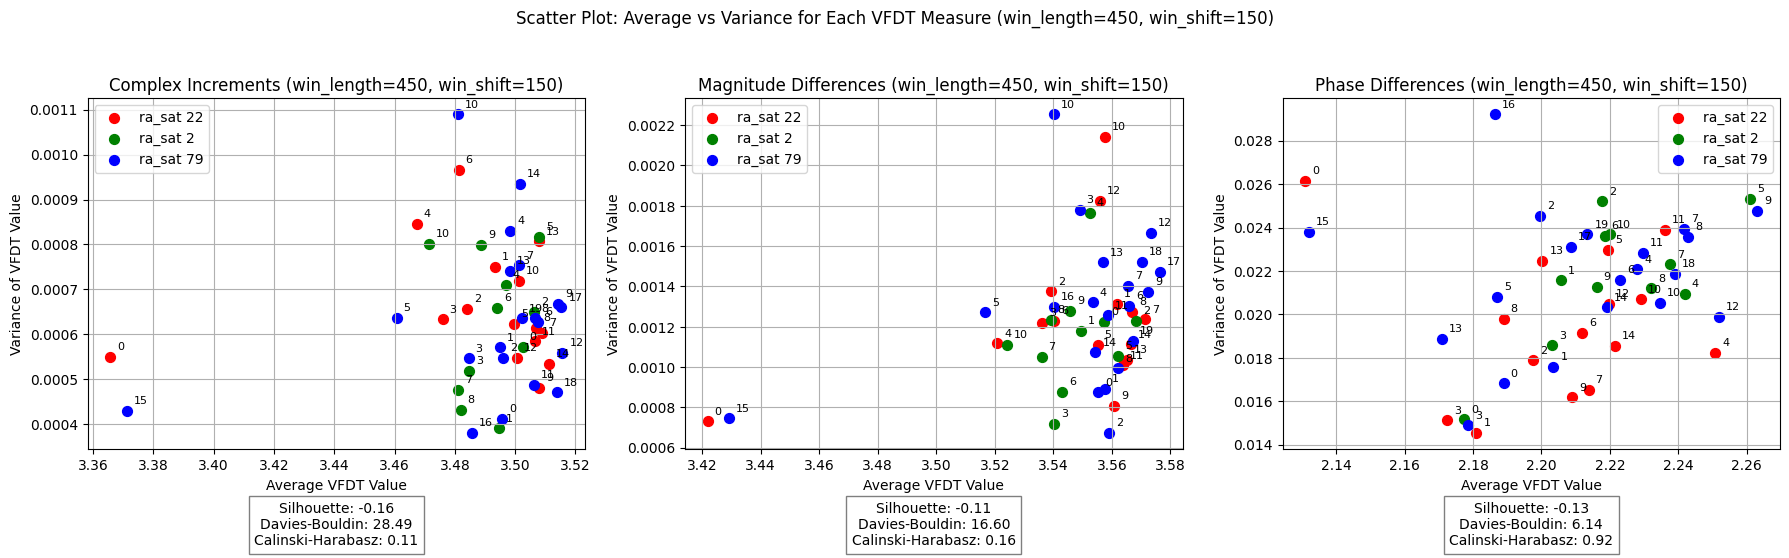

Processing with win_length = 450 and win_shift = 200...


KeyboardInterrupt: 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial import distance

# ------------------------------
# Test Code & Data Processing
# ------------------------------

# --- Parameters ---
data_dir = "/home/carlos/Documents/fingerprint/data"
suffix = 10  # Using the file with suffix "010" since suffix is an integer now

# --- Load Data ---
# NOTE: Make sure these functions (load_samples, load_data, VFDT) are defined in your codebase.
samples,_ = load_samples(data_dir, f"{suffix:03d}")
ra_sat, ra_cell = load_data(data_dir, f"{suffix:03d}")

# Ranges for the window parameters:
win_length_range = range(50, 1000, 50)  # e.g. 100, 200, 300, 400
win_shift_range = range(50, 1000, 50)      # e.g. 100, 200, 300, ... 900

# Specify the ra_sat groups to process
sat_list = [22, 2, 79]   # You can change this list as needed

# Define default colors for each ra_sat in sat_list.
default_colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']
color_map = {sat: default_colors[i % len(default_colors)] for i, sat in enumerate(sat_list)}

# Create DataFrame and set MultiIndex
df = pd.DataFrame({
    'ra_sat': ra_sat,
    'ra_cell': ra_cell,
    'samples': list(samples)
})
df.set_index(['ra_sat', 'ra_cell'], inplace=True)

# Filter: only ra_cell == 39 and ra_sat in sat_list
df_filtered = df.loc[df.index.get_level_values('ra_cell') == 39]
df_filtered = df_filtered[df_filtered.index.get_level_values('ra_sat').isin(sat_list)]

# Mapping from satellite id to a numeric label for cluster validity indices.
sat_to_label = {sat: i for i, sat in enumerate(sat_list)}

# Prepare a list to collect all the indices results.
results = []

# --- Loop over parameter combinations ---
for win_length in win_length_range:
    for win_shift in win_shift_range:
        if win_shift > win_length:
            # If win_shift is not less than win_length, break the inner loop and move to the next win_length.
            break

        print(f"Processing with win_length = {win_length} and win_shift = {win_shift}...")
        
        # Initialize dictionaries to store trajectories, averages, and variances per ra_sat group.
        trajectories_complex = {sat: [] for sat in sat_list}
        trajectories_magnitude = {sat: [] for sat in sat_list}
        trajectories_phase = {sat: [] for sat in sat_list}
        avg_complex = {sat: [] for sat in sat_list}
        var_complex = {sat: [] for sat in sat_list}
        avg_magnitude = {sat: [] for sat in sat_list}
        var_magnitude = {sat: [] for sat in sat_list}
        avg_phase = {sat: [] for sat in sat_list}
        var_phase = {sat: [] for sat in sat_list}
        
        # Process each signal in the filtered DataFrame.
        for (sat, cell), row in df_filtered.iterrows():
            signal = row['samples']
            # Assume signal shape is (11000, 2)
            i_signal = signal[:, 0]
            q_signal = signal[:, 1]
            
            # Apply VFDT with current parameters.
            vfdt_complex, vfdt_magnitude, vfdt_phase, window_indices = VFDT(i_signal, q_signal, win_length, win_shift)
            
            # Save trajectories.
            trajectories_complex[sat].append(vfdt_complex)
            trajectories_magnitude[sat].append(vfdt_magnitude)
            trajectories_phase[sat].append(vfdt_phase)
            
            # Compute average and variance (scalar) for each measure.
            avg_c = np.mean(vfdt_complex)
            var_c = np.var(vfdt_complex)
            avg_m = np.mean(vfdt_magnitude)
            var_m = np.var(vfdt_magnitude)
            avg_p = np.mean(vfdt_phase)
            var_p = np.var(vfdt_phase)
            
            # Append the computed values to the respective group lists.
            avg_complex[sat].append(avg_c)
            var_complex[sat].append(var_c)
            avg_magnitude[sat].append(avg_m)
            var_magnitude[sat].append(var_m)
            avg_phase[sat].append(avg_p)
            var_phase[sat].append(var_p)
        
        # 4. Scatter Plot: One figure with 3 subplots (one per VFDT measure)
        fig_scatter, axs_scatter = plt.subplots(1, 3, figsize=(18, 6))
        measure_names = ["Complex Increments", "Magnitude Differences", "Phase Differences"]
        
        # For each VFDT measure (each subplot), plot the data and compute the validity indices.
        for idx, (measure_name, avg_dict, var_dict) in enumerate(zip(
                measure_names, [avg_complex, avg_magnitude, avg_phase], [var_complex, var_magnitude, var_phase])):
            ax = axs_scatter[idx]
            
            # Build lists to combine data from all sat groups.
            X_data = []   # list of [avg, var] pairs.
            cluster_labels = []  # numeric cluster label for each point.
            
            for sat in sat_list:
                x_vals = np.array(avg_dict[sat])
                y_vals = np.array(var_dict[sat])
                ax.scatter(x_vals, y_vals, color=color_map[sat], s=50, label=f"ra_sat {sat}")
                # Annotate each point with its signal index.
                for i, (x_val, y_val) in enumerate(zip(x_vals, y_vals)):
                    ax.annotate(f"{i}", (x_val, y_val), textcoords="offset points", xytext=(5,5), fontsize=8)
                # Append the data and corresponding labels.
                for x_val, y_val in zip(x_vals, y_vals):
                    X_data.append([x_val, y_val])
                    cluster_labels.append(sat_to_label[sat])
            
            ax.set_xlabel("Average VFDT Value")
            ax.set_ylabel("Variance of VFDT Value")
            ax.set_title(f"{measure_name} (win_length={win_length}, win_shift={win_shift})")
            ax.grid(True)
            ax.legend()
            
            # Convert X_data and cluster_labels to numpy arrays.
            X_data = np.array(X_data)
            cluster_labels = np.array(cluster_labels)
            
            # Compute cluster validity indices (only if more than one cluster is present).
            if len(np.unique(cluster_labels)) > 1:
                sil_score = silhouette_score(X_data, cluster_labels)
                db_score = davies_bouldin_score(X_data, cluster_labels)
                ch_score = calinski_harabasz_score(X_data, cluster_labels)
            else:
                sil_score = db_score = ch_score = np.nan
            
            # Save results for later printing.
            results.append({
                'win_length': win_length,
                'win_shift': win_shift,
                'measure': measure_name,
                'silhouette': sil_score,
                'davies_bouldin': db_score,
                'calinski_harabasz': ch_score
            })
            
            # Create a text string with the indices and display it below the current subplot.
            text_str = (
                f"Silhouette: {sil_score:.2f}\n"
                f"Davies-Bouldin: {db_score:.2f}\n"
                f"Calinski-Harabasz: {ch_score:.2f}"
            )
            # Place the text below the subplot (using axis coordinates).
            ax.text(0.5, -0.15, text_str, transform=ax.transAxes,
                    fontsize=10, ha='center', va='top', bbox=dict(facecolor='white', alpha=0.5))
        
        plt.suptitle(f"Scatter Plot: Average vs Variance for Each VFDT Measure (win_length={win_length}, win_shift={win_shift})")
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# ------------------------------
# After the loops, print the table of results.
# ------------------------------
results_df = pd.DataFrame(results)
print("\nCluster Validity Indices for All Configurations:\n")
print(results_df)

# ------------------------------
# Composite Rankings and Best Configurations (per VFDT measure)
# ------------------------------
analysis_msgs = []
for measure in results_df['measure'].unique():
    df_measure = results_df[results_df['measure'] == measure].copy()
    # Composite Ranking 1: Based solely on Silhouette and Calinski-Harabasz (both descending)
    df_measure['rank_sil'] = df_measure['silhouette'].rank(ascending=False, method='min')
    df_measure['rank_ch']  = df_measure['calinski_harabasz'].rank(ascending=False, method='min')
    df_measure['composite1'] = df_measure['rank_sil'] + df_measure['rank_ch']
    best_comp1 = df_measure.loc[df_measure['composite1'].idxmin()]

    # Composite Ranking 2: Based on Silhouette (desc), Calinski-Harabasz (desc) and Davies-Bouldin (asc)
    df_measure['rank_db']  = df_measure['davies_bouldin'].rank(ascending=True, method='min')
    df_measure['composite2'] = df_measure['rank_sil'] + df_measure['rank_ch'] + df_measure['rank_db']
    best_comp2 = df_measure.loc[df_measure['composite2'].idxmin()]

    analysis_msgs.append(f"--- For measure: {measure} ---")
    analysis_msgs.append("Best configuration based on Composite Ranking 1 (Silhouette & Calinski-Harabasz):")
    analysis_msgs.append(f"    win_length: {best_comp1['win_length']}, win_shift: {best_comp1['win_shift']}")
    analysis_msgs.append("")
    analysis_msgs.append("Best configuration based on Composite Ranking 2 (Silhouette, Calinski-Harabasz & Davies-Bouldin):")
    analysis_msgs.append(f"    win_length: {best_comp2['win_length']}, win_shift: {best_comp2['win_shift']}")
    analysis_msgs.append("\n")

# Print the overall analysis.
analysis_text = "\n".join(analysis_msgs)
print("\nBest Configurations per VFDT Measure:")
print(analysis_text)


Processing with win_length = 50 and win_shift = 50...
Processing with win_length = 100 and win_shift = 50...
Processing with win_length = 100 and win_shift = 100...
Processing with win_length = 150 and win_shift = 50...
Processing with win_length = 150 and win_shift = 100...
Processing with win_length = 150 and win_shift = 150...
Processing with win_length = 200 and win_shift = 50...
Processing with win_length = 200 and win_shift = 100...
Processing with win_length = 200 and win_shift = 150...
Processing with win_length = 200 and win_shift = 200...
Processing with win_length = 250 and win_shift = 50...
Processing with win_length = 250 and win_shift = 100...
Processing with win_length = 250 and win_shift = 150...
Processing with win_length = 250 and win_shift = 200...
Processing with win_length = 250 and win_shift = 250...
Processing with win_length = 300 and win_shift = 50...
Processing with win_length = 300 and win_shift = 100...
Processing with win_length = 300 and win_shift = 150...

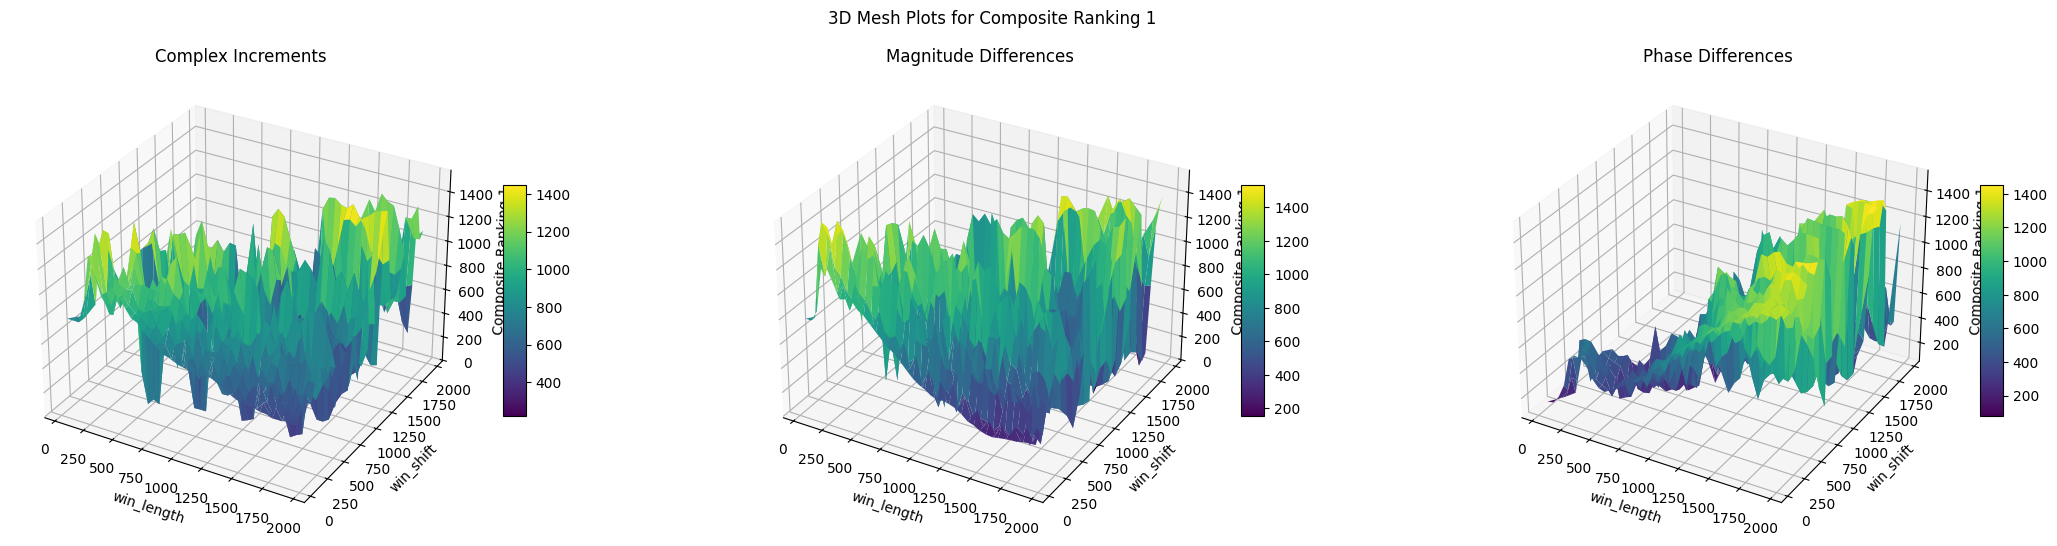

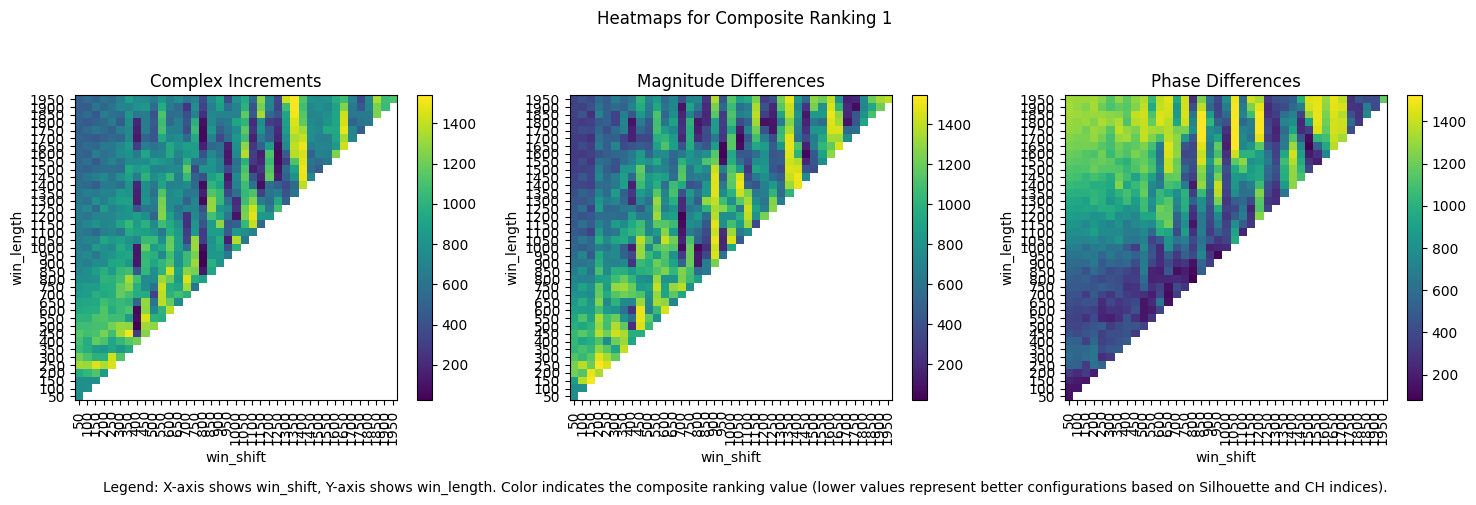

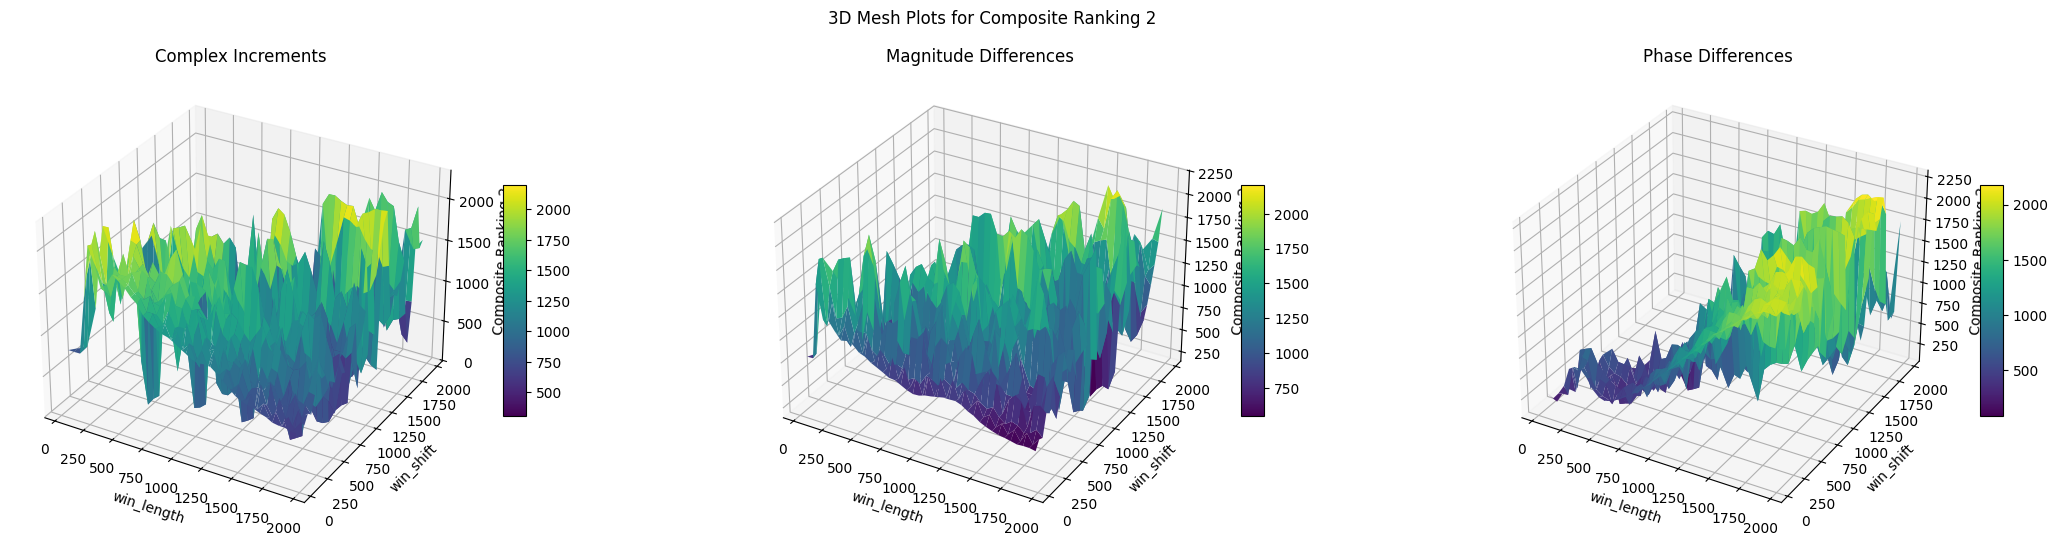

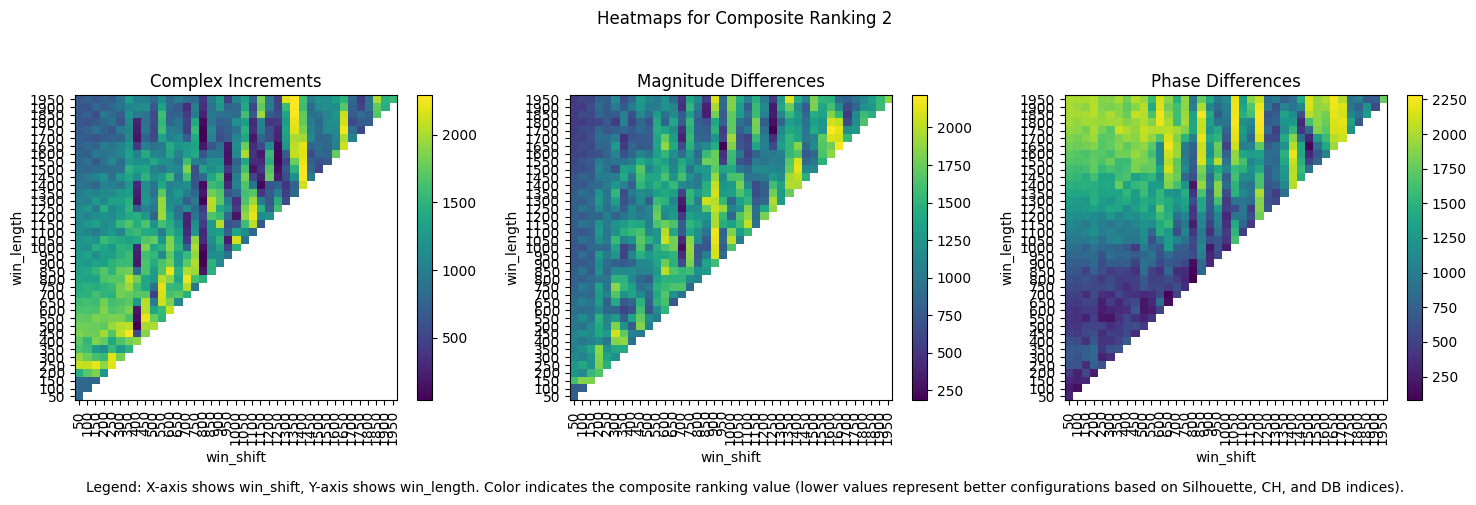

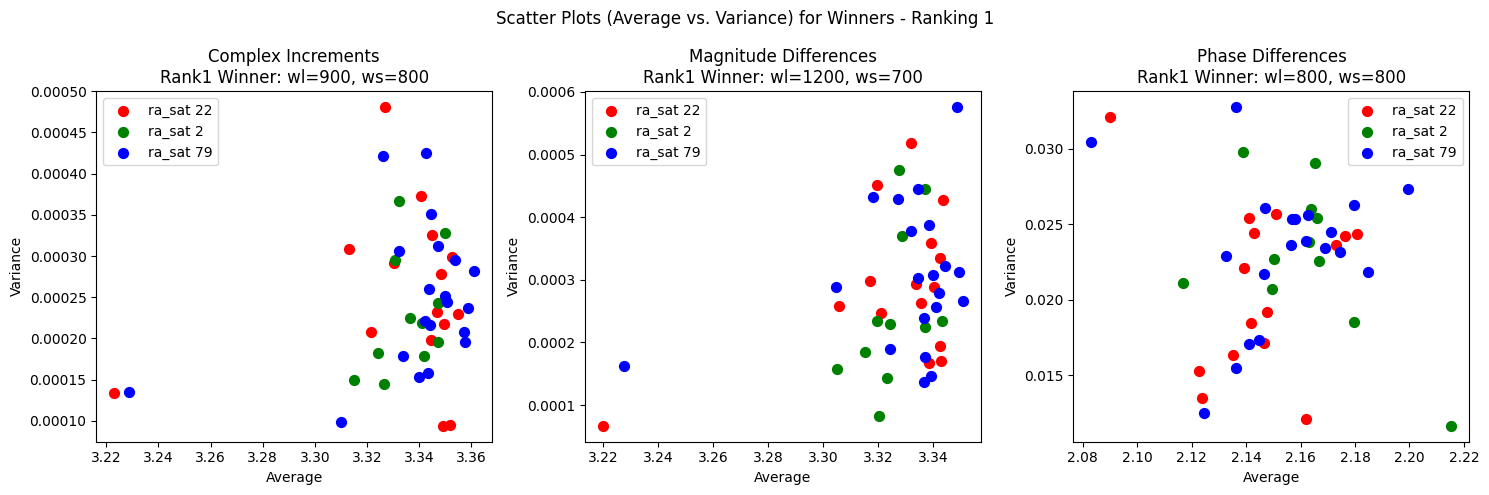

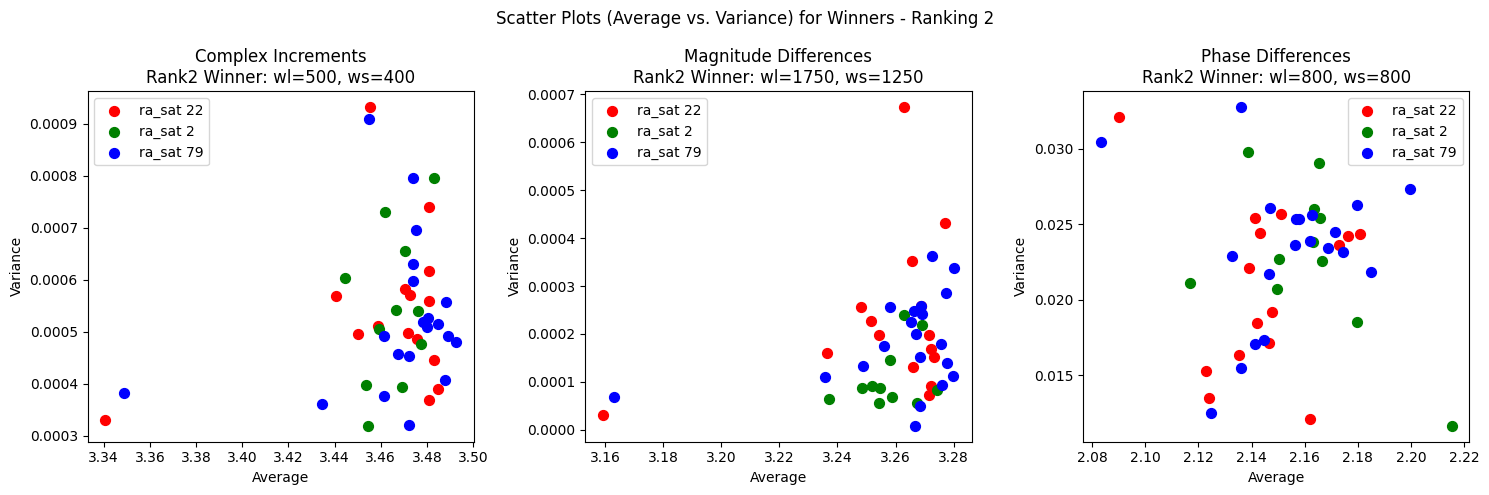

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# ------------------------------
# PARAMETERS AND OPTIONS
# ------------------------------
data_dir = "/home/carlos/Documents/fingerprint/data"
suffix = 10  # Using file with suffix "010"
win_length_initial = 200
win_shift_initial = 100

# Option: if True, plot every scatter plot of Average vs. Variance during processing.
# If False, only the winners will be plotted later.
plot_all_scatter = False

# Ranges for the window parameters:
win_length_range = range(50, 2000, 50)  # e.g., 100, 200, 300, ...
win_shift_range = range(50, 2000, 50)     # e.g., 100, 200, 300, ...

# Specify the ra_sat groups to process
sat_list = [22, 2, 79]   # Adjust as needed

# Define colors for each ra_sat.
default_colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']
color_map = {sat: default_colors[i % len(default_colors)] for i, sat in enumerate(sat_list)}

# ------------------------------
# LOAD DATA (Assuming these functions exist)
# ------------------------------
# Make sure these functions (load_samples, load_data, VFDT) are defined in your codebase.
samples,_ = load_samples(data_dir, f"{suffix:03d}")
ra_sat, ra_cell = load_data(data_dir, f"{suffix:03d}")

# Create DataFrame and set MultiIndex
df = pd.DataFrame({
    'ra_sat': ra_sat,
    'ra_cell': ra_cell,
    'samples': list(samples)
})
df.set_index(['ra_sat', 'ra_cell'], inplace=True)

# Filter: only ra_cell == 39 and ra_sat in sat_list
df_filtered = df.loc[df.index.get_level_values('ra_cell') == 39]
df_filtered = df_filtered[df_filtered.index.get_level_values('ra_sat').isin(sat_list)]

# Mapping from satellite id to a numeric label for cluster validity indices.
sat_to_label = {sat: i for i, sat in enumerate(sat_list)}

# Dictionary to store scatter data for each configuration.
# Key: (win_length, win_shift, measure), Value: (X_data, cluster_labels)
scatter_data = {}

# List to collect all validity indices results.
results = []

# ------------------------------
# PROCESSING LOOP: For each parameter combination, process signals and (optionally) plot scatter plots.
# ------------------------------
for win_length in win_length_range:
    for win_shift in win_shift_range:
        if win_shift > win_length:
            break  # Skip if win_shift is not less than win_length.

        print(f"Processing with win_length = {win_length} and win_shift = {win_shift}...")
        
        # Initialize dictionaries for storing VFDT measures per ra_sat.
        trajectories_complex = {sat: [] for sat in sat_list}
        trajectories_magnitude = {sat: [] for sat in sat_list}
        trajectories_phase = {sat: [] for sat in sat_list}
        avg_complex = {sat: [] for sat in sat_list}
        var_complex = {sat: [] for sat in sat_list}
        avg_magnitude = {sat: [] for sat in sat_list}
        var_magnitude = {sat: [] for sat in sat_list}
        avg_phase = {sat: [] for sat in sat_list}
        var_phase = {sat: [] for sat in sat_list}
        
        # Process each signal.
        for (sat, cell), row in df_filtered.iterrows():
            signal = row['samples']
            # Assume signal shape is (11000, 2)
            i_signal = signal[:, 0]
            q_signal = signal[:, 1]
            
            # Apply VFDT (this function should be defined elsewhere).
            vfdt_complex, vfdt_magnitude, vfdt_phase, window_indices = VFDT(i_signal, q_signal, win_length, win_shift)
            
            # Save trajectories (if needed for later use).
            trajectories_complex[sat].append(vfdt_complex)
            trajectories_magnitude[sat].append(vfdt_magnitude)
            trajectories_phase[sat].append(vfdt_phase)
            
            # Compute average and variance for each measure.
            avg_c = np.mean(vfdt_complex)
            var_c = np.var(vfdt_complex)
            avg_m = np.mean(vfdt_magnitude)
            var_m = np.var(vfdt_magnitude)
            avg_p = np.mean(vfdt_phase)
            var_p = np.var(vfdt_phase)
            
            # Store the computed values.
            avg_complex[sat].append(avg_c)
            var_complex[sat].append(var_c)
            avg_magnitude[sat].append(avg_m)
            var_magnitude[sat].append(var_m)
            avg_phase[sat].append(avg_p)
            var_phase[sat].append(var_p)
        
        # Create scatter plots for the three VFDT measures.
        measure_names = ["Complex Increments", "Magnitude Differences", "Phase Differences"]
        # If plotting every scatter plot, create a new figure for this parameter combination.
        if plot_all_scatter:
            fig_scatter, axs_scatter = plt.subplots(1, 3, figsize=(18, 6))
        
        for idx, (measure_name, avg_dict, var_dict) in enumerate(zip(
                measure_names, [avg_complex, avg_magnitude, avg_phase], [var_complex, var_magnitude, var_phase])):
            # Build data arrays for scatter plot.
            X_data = []   # List of [average, variance] pairs.
            cluster_labels = []  # Numeric cluster labels.
            
            for sat in sat_list:
                x_vals = np.array(avg_dict[sat])
                y_vals = np.array(var_dict[sat])
                # Append data and corresponding labels.
                for x_val, y_val in zip(x_vals, y_vals):
                    X_data.append([x_val, y_val])
                    cluster_labels.append(sat_to_label[sat])
            
            X_data = np.array(X_data)
            cluster_labels = np.array(cluster_labels)
            # Save the scatter data for later (keyed by current configuration and measure).
            scatter_data[(win_length, win_shift, measure_name)] = (X_data, cluster_labels)
            
            # Compute validity indices (only if more than one cluster).
            if len(np.unique(cluster_labels)) > 1:
                sil_score = silhouette_score(X_data, cluster_labels)
                db_score = davies_bouldin_score(X_data, cluster_labels)
                ch_score = calinski_harabasz_score(X_data, cluster_labels)
            else:
                sil_score = db_score = ch_score = np.nan
            
            # Save the results.
            results.append({
                'win_length': win_length,
                'win_shift': win_shift,
                'measure': measure_name,
                'silhouette': sil_score,
                'davies_bouldin': db_score,
                'calinski_harabasz': ch_score
            })
            
            # If plotting all scatter plots, plot now.
            if plot_all_scatter:
                ax = axs_scatter[idx]
                for sat in sat_list:
                    x_vals = np.array(avg_dict[sat])
                    y_vals = np.array(var_dict[sat])
                    ax.scatter(x_vals, y_vals, color=color_map[sat], s=50, label=f"ra_sat {sat}")
                ax.set_xlabel("Average VFDT Value")
                ax.set_ylabel("Variance of VFDT Value")
                ax.set_title(f"{measure_name}\n(win_length={win_length}, win_shift={win_shift})")
                ax.grid(True)
                ax.legend()
        if plot_all_scatter:
            plt.suptitle(f"Scatter Plots: Average vs. Variance (win_length={win_length}, win_shift={win_shift})")
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()

# ------------------------------
# Create a DataFrame from results.
# ------------------------------
results_df = pd.DataFrame(results)

# ------------------------------
# Compute Composite Rankings per VFDT measure.
# For each measure, compute two composite scores:
#   - Composite Ranking 1: rank_sil + rank_ch (Silhouette & CH: descending order)
#   - Composite Ranking 2: rank_sil + rank_ch + rank_db (Silhouette & CH descending; DB ascending)
# ------------------------------
analysis_msgs = {}
for measure in results_df['measure'].unique():
    df_measure = results_df[results_df['measure'] == measure].copy()
    
    # Ranking for Silhouette and Calinski-Harabasz (descending: higher is better)
    df_measure['rank_sil'] = df_measure['silhouette'].rank(ascending=False, method='min')
    df_measure['rank_ch']  = df_measure['calinski_harabasz'].rank(ascending=False, method='min')
    df_measure['composite1'] = df_measure['rank_sil'] + df_measure['rank_ch']
    
    # Ranking for Davies-Bouldin (ascending: lower is better)
    df_measure['rank_db']  = df_measure['davies_bouldin'].rank(ascending=True, method='min')
    df_measure['composite2'] = df_measure['rank_sil'] + df_measure['rank_ch'] + df_measure['rank_db']
    
    best_comp1 = df_measure.loc[df_measure['composite1'].idxmin()]
    best_comp2 = df_measure.loc[df_measure['composite2'].idxmin()]
    
    analysis_msgs[measure] = {
        'df': df_measure,
        'best_comp1': best_comp1,
        'best_comp2': best_comp2
    }
    
    print(f"--- Analysis for measure: {measure} ---")
    print("Best configuration based on Composite Ranking 1 (Silhouette + CH):")
    print(f"    win_length: {best_comp1['win_length']}, win_shift: {best_comp1['win_shift']}")
    print("Best configuration based on Composite Ranking 2 (Silhouette + CH + DB):")
    print(f"    win_length: {best_comp2['win_length']}, win_shift: {best_comp2['win_shift']}\n")

# ------------------------------
# Prepare list of measures and number of measures.
# ------------------------------
measures = list(analysis_msgs.keys())
num_measures = len(measures)

# ------------------------------
# 1. 3D Mesh Plots for Composite Ranking 1 (one subplot per measure)
# ------------------------------
fig = plt.figure(figsize=(9*num_measures, 6))
for i, measure in enumerate(measures):
    df_measure = analysis_msgs[measure]['df']
    # Pivot table: rows=win_length, cols=win_shift, values=composite1.
    pivot_df = df_measure.pivot(index='win_length', columns='win_shift', values='composite1')
    # Create mesh grid. Use indexing='ij' so that X corresponds to win_length (rows)
    X, Y = np.meshgrid(pivot_df.index.astype(float), pivot_df.columns.astype(float), indexing='ij')
    Z = pivot_df.values
    ax = fig.add_subplot(1, num_measures, i+1, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_xlabel("win_length")
    ax.set_ylabel("win_shift")
    ax.set_zlabel("Composite Ranking 1")
    ax.set_title(f"{measure}")
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.suptitle("3D Mesh Plots for Composite Ranking 1")
plt.show()

# ------------------------------
# 2. Plot: Heatmaps for Composite Ranking 1 (one subplot per measure)
# ------------------------------
fig, axs = plt.subplots(1, num_measures, figsize=(5*num_measures, 5))
for i, measure in enumerate(measures):
    df_measure = analysis_msgs[measure]['df']
    pivot_df = df_measure.pivot(index='win_length', columns='win_shift', values='composite1')
    ax = axs[i]
    im = ax.imshow(pivot_df, aspect='auto', origin='lower', cmap='viridis')
    ax.set_title(f"{measure}")
    ax.set_xlabel("win_shift")
    ax.set_ylabel("win_length")
    # Rotate x-axis tick labels vertically.
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.set_xticks(np.arange(len(pivot_df.columns)))
    ax.set_xticklabels(pivot_df.columns)
    ax.set_yticks(np.arange(len(pivot_df.index)))
    ax.set_yticklabels(pivot_df.index)
    plt.colorbar(im, ax=ax)
# Add a common legend text for the heatmaps.
plt.figtext(0.5, 0.01, 
            "Legend: X-axis shows win_shift, Y-axis shows win_length. Color indicates the composite ranking value "
            "(lower values represent better configurations based on Silhouette and CH indices).", 
            ha="center", va="bottom", fontsize=10)
plt.suptitle("Heatmaps for Composite Ranking 1")
plt.tight_layout(rect=[0, 0.04, 1, 0.95])
plt.show()

# ------------------------------
# 3. 3D Mesh Plots for Composite Ranking 2 (one subplot per measure)
# ------------------------------
fig = plt.figure(figsize=(9*num_measures, 6))
for i, measure in enumerate(measures):
    df_measure = analysis_msgs[measure]['df']
    pivot_df = df_measure.pivot(index='win_length', columns='win_shift', values='composite2')
    X, Y = np.meshgrid(pivot_df.index.astype(float), pivot_df.columns.astype(float), indexing='ij')
    Z = pivot_df.values
    ax = fig.add_subplot(1, num_measures, i+1, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_xlabel("win_length")
    ax.set_ylabel("win_shift")
    ax.set_zlabel("Composite Ranking 2")
    ax.set_title(f"{measure}")
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.suptitle("3D Mesh Plots for Composite Ranking 2")
plt.show()

# ------------------------------
# 4. Plot: Heatmaps for Composite Ranking 2 (one subplot per measure)
# ------------------------------
fig, axs = plt.subplots(1, num_measures, figsize=(5*num_measures, 5))
for i, measure in enumerate(measures):
    df_measure = analysis_msgs[measure]['df']
    pivot_df = df_measure.pivot(index='win_length', columns='win_shift', values='composite2')
    ax = axs[i]
    im = ax.imshow(pivot_df, aspect='auto', origin='lower', cmap='viridis')
    ax.set_title(f"{measure}")
    ax.set_xlabel("win_shift")
    ax.set_ylabel("win_length")
    # Rotate x-axis tick labels vertically.
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.set_xticks(np.arange(len(pivot_df.columns)))
    ax.set_xticklabels(pivot_df.columns)
    ax.set_yticks(np.arange(len(pivot_df.index)))
    ax.set_yticklabels(pivot_df.index)
    plt.colorbar(im, ax=ax)
plt.figtext(0.5, 0.01, 
            "Legend: X-axis shows win_shift, Y-axis shows win_length. Color indicates the composite ranking value "
            "(lower values represent better configurations based on Silhouette, CH, and DB indices).", 
            ha="center", va="bottom", fontsize=10)
plt.suptitle("Heatmaps for Composite Ranking 2")
plt.tight_layout(rect=[0, 0.04, 1, 0.95])
plt.show()

# ------------------------------
# 5. Scatter Plots (Average vs. Variance) for Winners based on Ranking 1
# ------------------------------
fig, axs = plt.subplots(1, num_measures, figsize=(5*num_measures, 5))
for i, measure in enumerate(measures):
    best_config = analysis_msgs[measure]['best_comp1']
    wl = best_config['win_length']
    ws = best_config['win_shift']
    key = (wl, ws, measure)
    ax = axs[i]
    if key in scatter_data:
        X_data, cluster_labels = scatter_data[key]
        for sat in sat_list:
            mask = (cluster_labels == sat_to_label[sat])
            ax.scatter(X_data[mask, 0], X_data[mask, 1], color=color_map[sat], s=50, label=f"ra_sat {sat}")
        ax.set_title(f"{measure}\nRank1 Winner: wl={wl}, ws={ws}")
        ax.set_xlabel("Average")
        ax.set_ylabel("Variance")
        ax.legend()
    else:
        ax.text(0.5, 0.5, "No data", horizontalalignment='center', verticalalignment='center')
plt.suptitle("Scatter Plots (Average vs. Variance) for Winners - Ranking 1")
plt.tight_layout()
plt.show()

# ------------------------------
# 6. Scatter Plots (Average vs. Variance) for Winners based on Ranking 2
# ------------------------------
fig, axs = plt.subplots(1, num_measures, figsize=(5*num_measures, 5))
for i, measure in enumerate(measures):
    best_config = analysis_msgs[measure]['best_comp2']
    wl = best_config['win_length']
    ws = best_config['win_shift']
    key = (wl, ws, measure)
    ax = axs[i]
    if key in scatter_data:
        X_data, cluster_labels = scatter_data[key]
        for sat in sat_list:
            mask = (cluster_labels == sat_to_label[sat])
            ax.scatter(X_data[mask, 0], X_data[mask, 1], color=color_map[sat], s=50, label=f"ra_sat {sat}")
        ax.set_title(f"{measure}\nRank2 Winner: wl={wl}, ws={ws}")
        ax.set_xlabel("Average")
        ax.set_ylabel("Variance")
        ax.legend()
    else:
        ax.text(0.5, 0.5, "No data", horizontalalignment='center', verticalalignment='center')
plt.suptitle("Scatter Plots (Average vs. Variance) for Winners - Ranking 2")
plt.tight_layout()
plt.show()
